# HW5 - Part 2 (Software Project Management)

# **Rutul Mehta - A20476293**

# **Import Packages**

In [3]:
import pandas as pd

import datetime
from datetime import datetime, date, timedelta
import time
from math import isnan
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import plotly.express as px

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.python.util.deprecation as deprecation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from pylab import rcParams

import warnings

deprecation._PRINT_DEPRECATION_WARNINGS = False
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('issues.csv')
df

issue_number OriginationPhase  ...  closed_at              Author
0                 1     Requirements  ...        NaN       Smith, Electa
1                 2           Design  ...        NaN     Murazik, Meagan
2                 3     Requirements  ...   3/7/2019  Predovic, Scarlett
3                 4          Testing  ...   3/8/2019     Wehner, Lambert
4                 5    Documentation  ...        NaN    Bauch, Frederick
...             ...              ...  ...        ...                 ...
16393         16394          Testing  ...        NaN      Sporer, Marvin
16394         16395    Documentation  ...   3/9/2019        Rice, Elbert
16395         16396           Design  ...        NaN         Kub, Melyna
16396         16397           Design  ...  3/11/2019    Quitzon, Linwood
16397         16398     Requirements  ...  3/12/2019   Morissette, Carol

[16398 rows x 9 columns]

# **Issues Tracking and Report Design**

**1) Plot in Bar Chart the total number of issues created every day**

[Text(0, 0.5, 'Total Issues'),
 Text(0.5, 0, 'Created dates'),
 Text(0.5, 1.0, 'Stacked Bar Chart for total number of issues created every day')]

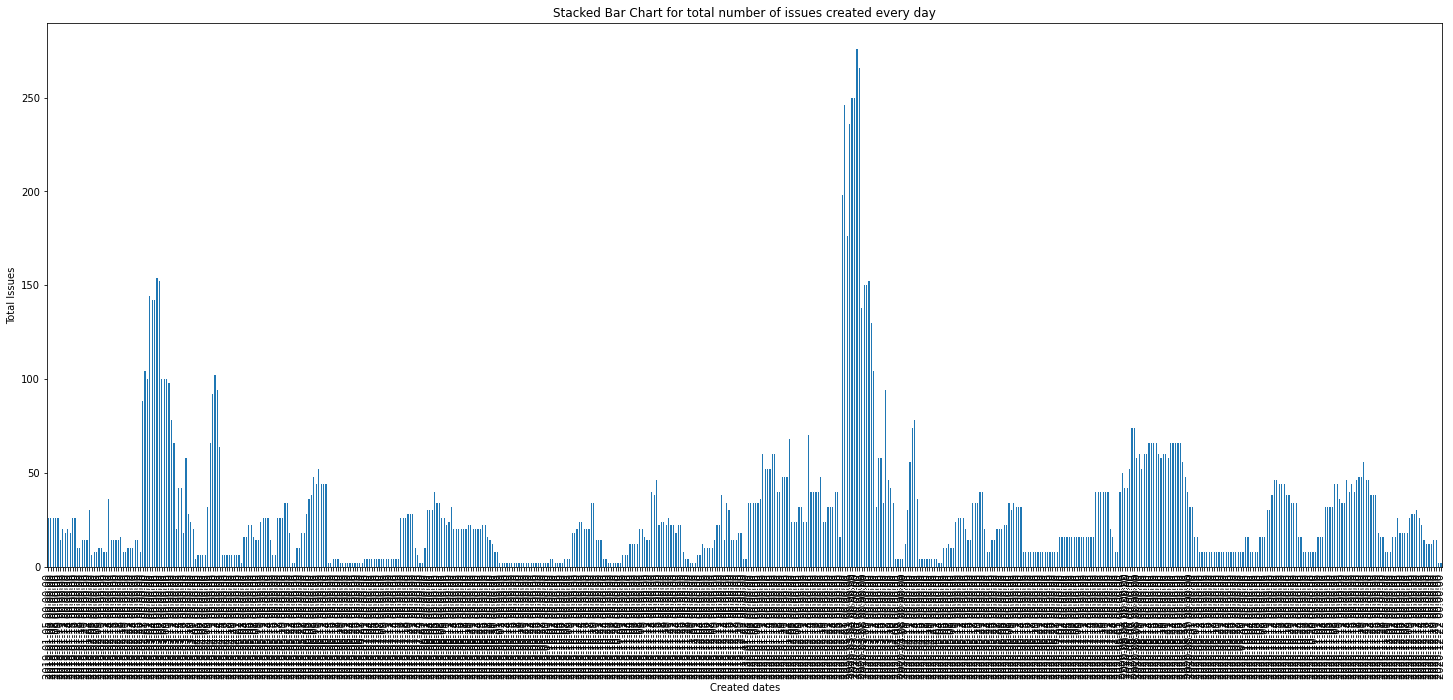

In [6]:
df1 = df[['created_at', 'issue_number']]
df1['created_at'] = pd.to_datetime(df1['created_at'])
DailyIssue = df1.groupby(['created_at']).created_at.count()

ax = DailyIssue.plot(kind='bar',figsize=(25,10), rot=90)
ax.set(xlabel="Created dates", ylabel="Total Issues",
        title="Stacked Bar Chart for total number of issues created every day")

**2) Plot in Bar Chart the total number of issues created every day and originated in Design phase**

[Text(0, 0.5, 'Total Issues'),
 Text(0.5, 0, 'Created dates'),
 Text(0.5, 1.0, 'Stacked Bar Chart for total number of issues created every day and originated in Design phase')]

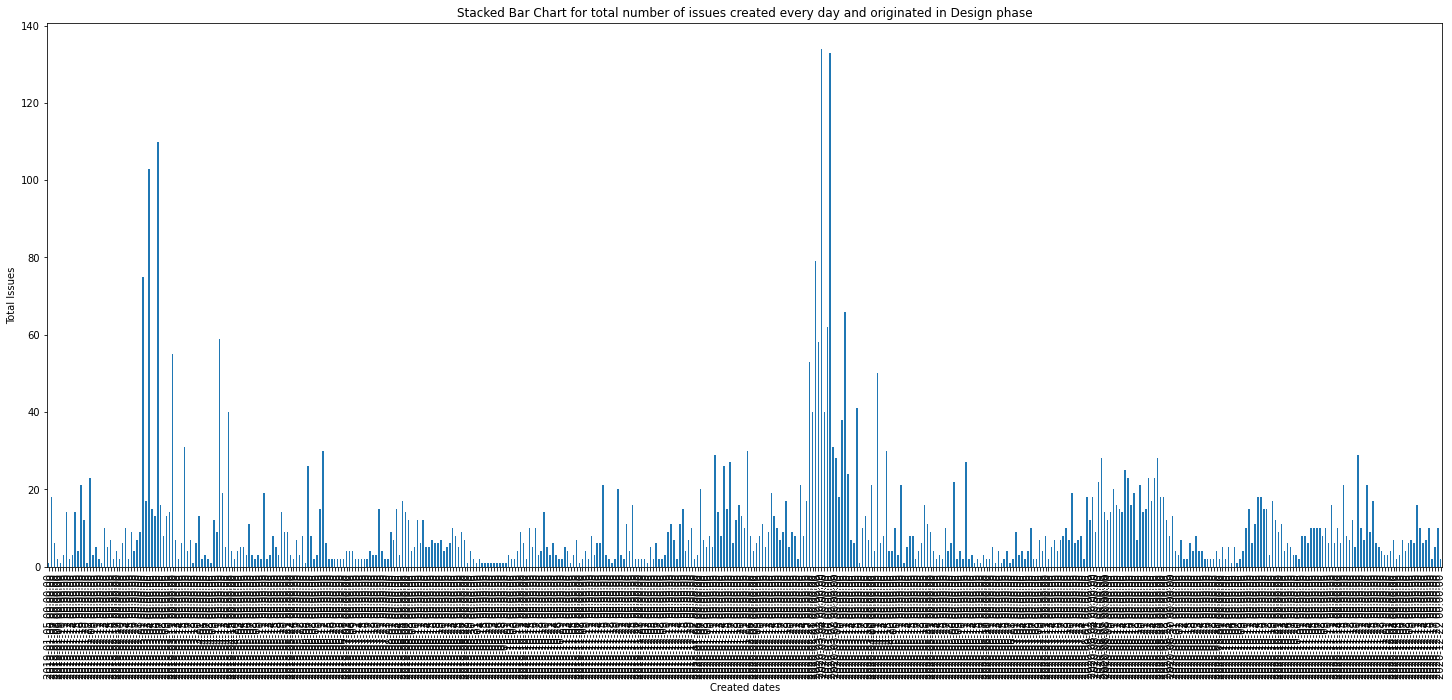

In [7]:
filter_df2 = df.loc[df['OriginationPhase'] == "Design"]
df2 = filter_df2[['created_at', 'issue_number']]
df2['created_at'] = pd.to_datetime(df2['created_at'])
DailyIssue = df2.groupby(['created_at']).created_at.count()

ax = DailyIssue.plot(kind='bar', figsize=(25,10), rot=90)
ax.set(xlabel="Created dates", ylabel="Total Issues",
        title="Stacked Bar Chart for total number of issues created every day and originated in Design phase")

**3) Plot in Stacked Bar Chart the total number of issues based on their priorities created for every originating phase**

[Text(0, 0.5, 'Issues per priority'),
 Text(0.5, 0, 'Priority Date'),
 Text(0.5, 1.0, 'Stacked Bar Chart for the total number of issues based on their priorities created for every originating phase')]

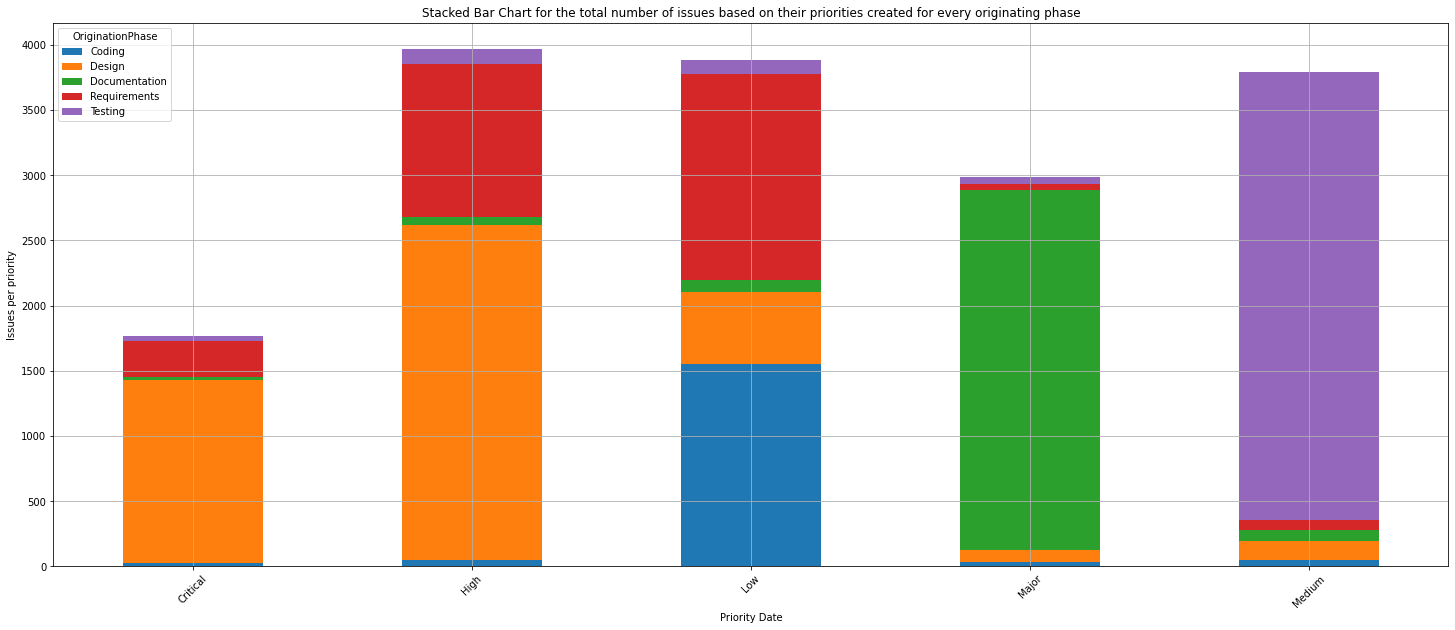

In [8]:
df3 = df.groupby(['Priority', 'OriginationPhase']).created_at.count().unstack()

ax = df3.plot(kind='bar', stacked=True, grid=True, figsize=(25,10), rot=45)
ax.grid(b=True, which='major', axis='y')
ax.set(xlabel="Priority Date", ylabel="Issues per priority",
      title="Stacked Bar Chart for the total number of issues based on their priorities created for every originating phase")

**4) Plot in Bar Chart the total number of issues closed in every day for every DetectionPhase that have labels(Category:Bug,Priority:Critical, Status:Completed)**

[Text(0, 0.5, 'Issues per Detection Phase'),
 Text(0.5, 0, 'Closed Date'),
 Text(0.5, 1.0, 'Bar Chart for the total number of issues closed in every day for every DetectionPhase that have labels (Category:Bug, Priority:Critical, Status:Completed)')]

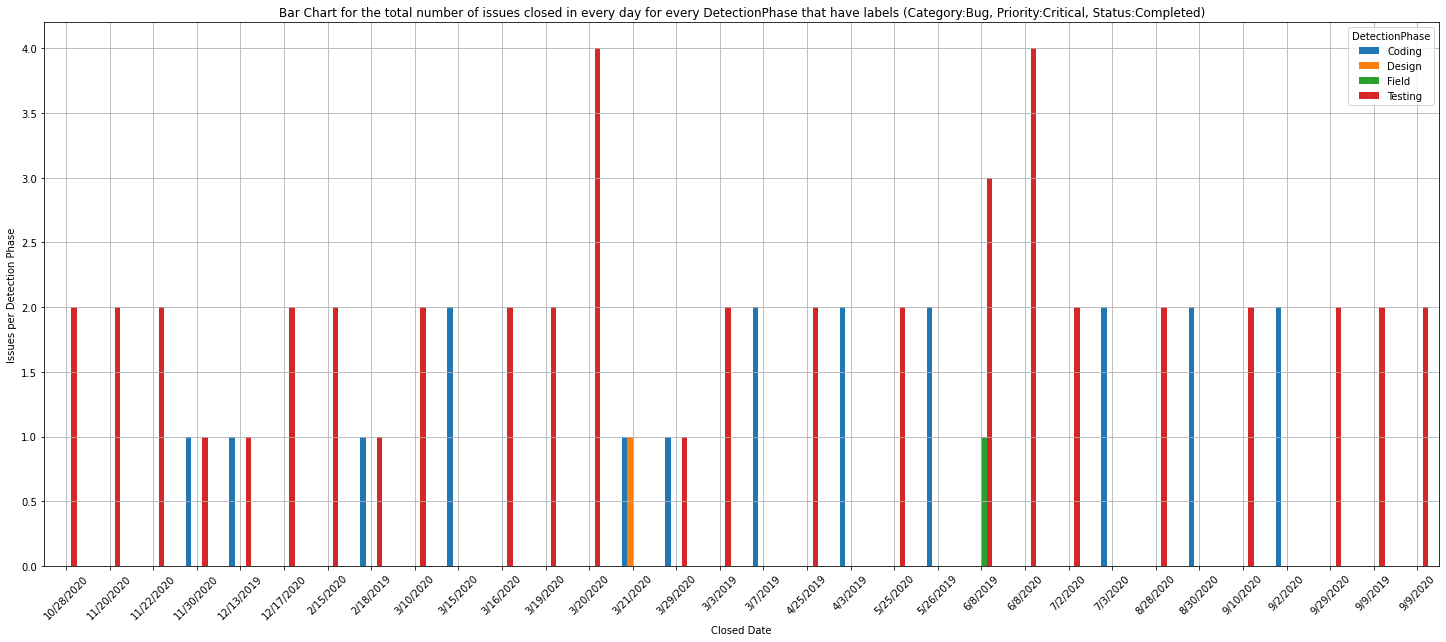

In [9]:
filter_df4 = df.loc[(df['Category'] == 'Bug') & (df['Priority'] == 'Critical') & (df['Status'] == 'Completed')]
df4 = filter_df4.groupby(['closed_at', 'DetectionPhase']).created_at.count().unstack().fillna(0)

ax = df4.plot(kind='bar', grid=True, figsize=(25,10), rot=45)
ax.grid(b=True, which='major', axis='y')
ax.set(xlabel="Closed Date", ylabel="Issues per Detection Phase",
        title="Bar Chart for the total number of issues closed in every day for every DetectionPhase that have labels (Category:Bug, Priority:Critical, Status:Completed)")

**5) Plot in Pivot Chart the total number of issue status created for every OriginationPhase (group by originating phase)**

[Text(0, 0.5, 'Total Issues Status per Origination Phase'),
 Text(0.5, 0, 'Status'),
 Text(0.5, 1.0, 'Pivot Chart the total number of issue status created for every OriginationPhase')]

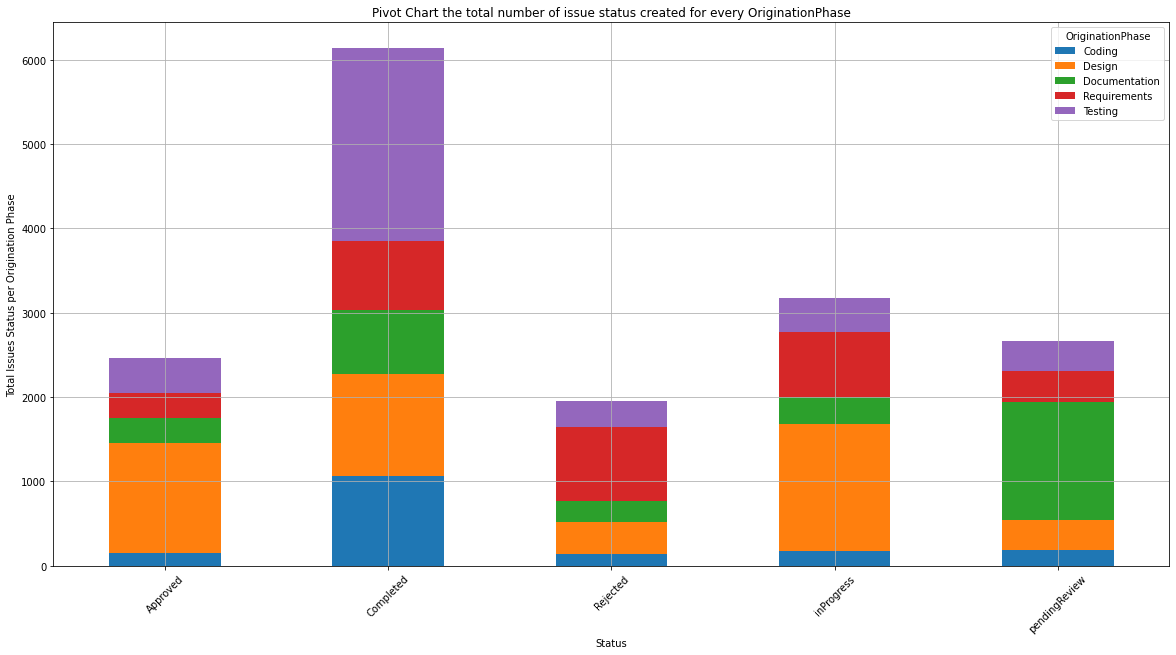

In [10]:
df5 = df.groupby(['Status', 'OriginationPhase']).created_at.count().unstack().fillna(0)

ax = df5.plot(kind='bar', stacked=True, grid=True, figsize=(20,10), rot=45)
ax.grid(b=True,which='major',axis='y')
ax.set(xlabel="Status", ylabel="Total Issues Status per Origination Phase",
        title="Pivot Chart the total number of issue status created for every OriginationPhase")

**Figure - 1**

**6) Plot in Control Chart for the total number of Critical issues created every week and originated in Design phase. Your Control chart must plot/show the UCL (Upper Control Limit) and LCL (Lower Control Limit)**

In [11]:
df6 = df.loc[(df['Priority'] == 'Critical') & (df['OriginationPhase'] == 'Design')].reset_index().drop(columns=['DetectionPhase', 'OriginationPhase', 'Category', 'Priority', 'closed_at', 'index', 'Status', 'Author'])
df6['created_at'] = pd.to_datetime(df6['created_at'])
df6.set_index('created_at', inplace=True)
df6_resample = df6.resample('W').count()
df6_resample.head()

issue_number
created_at              
2019-01-06            14
2019-01-13             6
2019-01-20            12
2019-01-27             0
2019-02-03             0

In [12]:
df6_resample_summary = df6_resample.describe()
df6_resample_summary

issue_number
count    103.000000
mean      13.640777
std       23.967647
min        0.000000
25%        2.000000
50%        7.000000
75%       17.000000
max      197.000000

In [13]:
v1 = df6_resample_summary.loc['25%']['issue_number']
v2 = df6_resample_summary.loc['50%']['issue_number']
v3 = df6_resample_summary.loc['75%']['issue_number']
vMean = df6_resample_summary.loc['mean']['issue_number']
IQR = v3 - v1
UCL = v2 + 1.5 * IQR
LCL = v2 - 1.5 * IQR

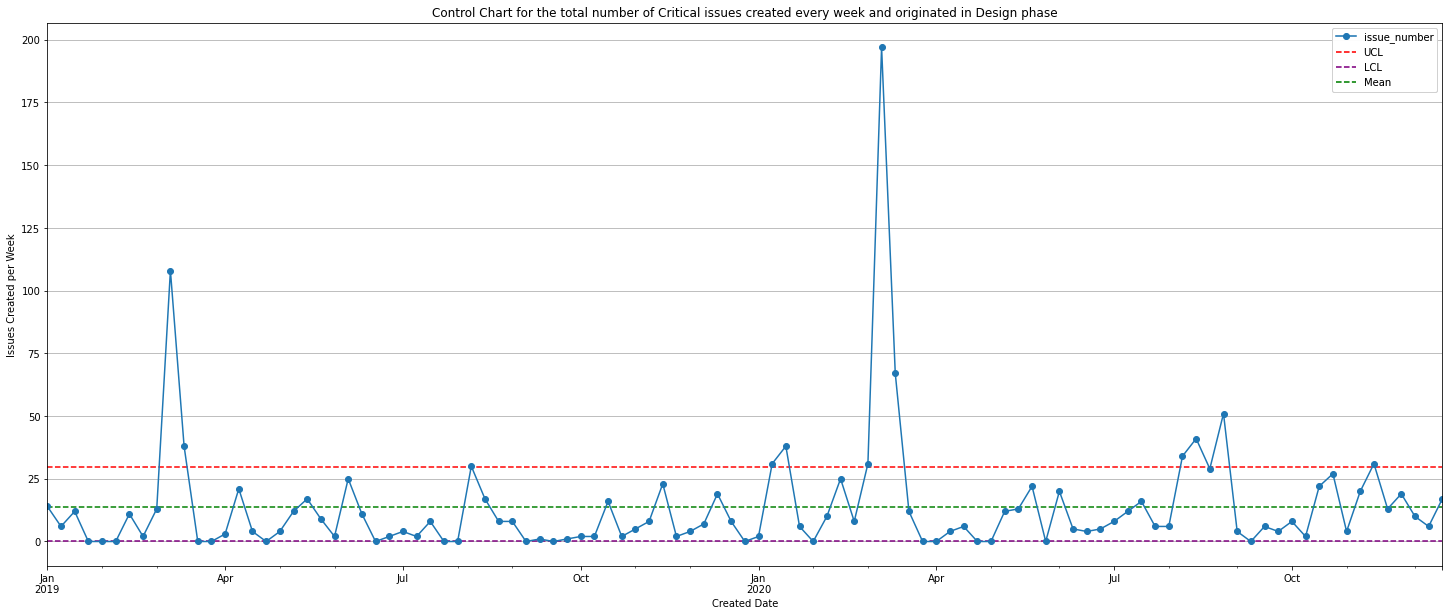

In [14]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()
df6_resample.reset_index().plot(x='created_at', y='issue_number', kind='line', marker='o',ax=ax)
ax.grid(b=True, which='major', axis='y')
ax.set(xlabel="Created Date", ylabel="Issues Created per Week",
      title="Control Chart for the total number of Critical issues created every week and originated in Design phase")
plt.hlines(y=UCL, xmin=ax.get_xticks().min(), xmax=ax.get_xticks().max(), linestyle='dashed', color='red', label='UCL')
plt.hlines(y=max(LCL,0), xmin=ax.get_xticks().min(), xmax=ax.get_xticks().max(), linestyle='dashed', color='purple', label='LCL')
plt.hlines(y=vMean, xmin=ax.get_xticks().min(), xmax=ax.get_xticks().max(), linestyle='dashed', color='green', label='Mean')
leg1 = ax.legend()
ax.add_artist(leg1)
plt.show()

# **Create the analysis report to Support the Decision Making process, issues forecasting, and project planning**

**1) Are there any useful patterns of outliers in the dataset?**

In [15]:
df1_Analysis_created = df[['created_at', 'issue_number']]
df1_Analysis_created['created_at'] = pd.to_datetime(df1_Analysis_created['created_at'])
df1_Analysis_created.set_index('created_at', inplace=True)
df1_Analysis_created_resample = df1_Analysis_created.resample('W').count()
df1_Analysis_created_resample.head()

issue_number
created_at              
2019-01-06            52
2019-01-13           150
2019-01-20           118
2019-01-27            44
2019-02-03             0

In [16]:
df1_Analysis_closed = df[['closed_at', 'issue_number']]
df1_Analysis_closed['closed_at'] = pd.to_datetime(df1_Analysis_closed['closed_at'])
df1_Analysis_closed.set_index('closed_at', inplace=True)
df1_Analysis_closed_resample = df1_Analysis_closed.resample('W').count()
df1_Analysis_closed_resample.head()

issue_number
closed_at               
2019-02-17            12
2019-02-24            26
2019-03-03            80
2019-03-10           168
2019-03-17           357

In [17]:
df1_Analysis_created_resample_summary = df1_Analysis_created_resample.describe()
v1_Analysis_created = df1_Analysis_created_resample_summary.loc['25%']['issue_number']
v2_Analysis_created = df1_Analysis_created_resample_summary.loc['50%']['issue_number']
v3_Analysis_created = df1_Analysis_created_resample_summary.loc['75%']['issue_number']
vMean_Analysis_created = df1_Analysis_created_resample_summary.loc['mean']['issue_number']
IQR_Analysis_created = v3_Analysis_created - v1_Analysis_created
UCL_Analysis_created = v2_Analysis_created + 1.5 * IQR_Analysis_created
LCL_Analysis_created = v2_Analysis_created - 1.5 * IQR_Analysis_created

In [18]:
df1_Analysis_closed_resample_summary = df1_Analysis_closed_resample.describe()
v1_Analysis_closed = df1_Analysis_closed_resample_summary.loc['25%']['issue_number']
v2_Analysis_closed = df1_Analysis_closed_resample_summary.loc['50%']['issue_number']
v3_Analysis_closed = df1_Analysis_closed_resample_summary.loc['75%']['issue_number']
vMean_Analysis_closed = df1_Analysis_closed_resample_summary.loc['mean']['issue_number']
IQR_Analysis_closed = v3_Analysis_closed - v1_Analysis_closed
UCL_Analysis_closed = v2_Analysis_closed + 1.5 * IQR_Analysis_closed
LCL_Analysis_closed = v2_Analysis_closed - 1.5 * IQR_Analysis_closed

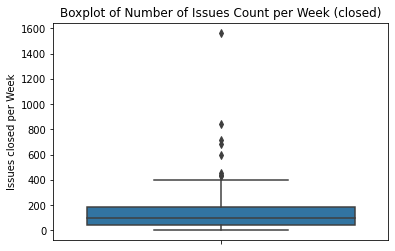

In [19]:
sns.boxplot(y='issue_number', data=df1_Analysis_created_resample.reset_index())
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.ylabel('Issues closed per Week')
plt.title('Boxplot of Number of Issues Count per Week (closed)')
plt.show()

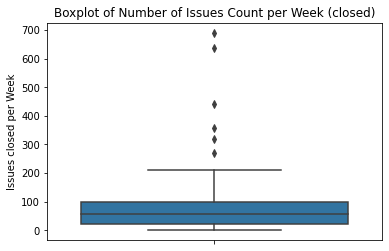

In [20]:
sns.boxplot(y='issue_number', data=df1_Analysis_closed_resample.reset_index())
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.ylabel('Issues closed per Week')
plt.title('Boxplot of Number of Issues Count per Week (closed)')
plt.show()

In [21]:
def define_outliers(val, LCL, UCL):
  if val < LCL or val > UCL:
    return 'Outlier'
  else:
    return 'Normal'

In [22]:
df1_Analysis_closed_resample['status'] = df1_Analysis_closed_resample.apply(lambda x: define_outliers(x['issue_number'], LCL_Analysis_closed, UCL_Analysis_closed), axis=1)
df1_Analysis_created_resample['status'] = df1_Analysis_created_resample.apply(lambda x: define_outliers(x['issue_number'], LCL_Analysis_created, UCL_Analysis_created), axis=1)

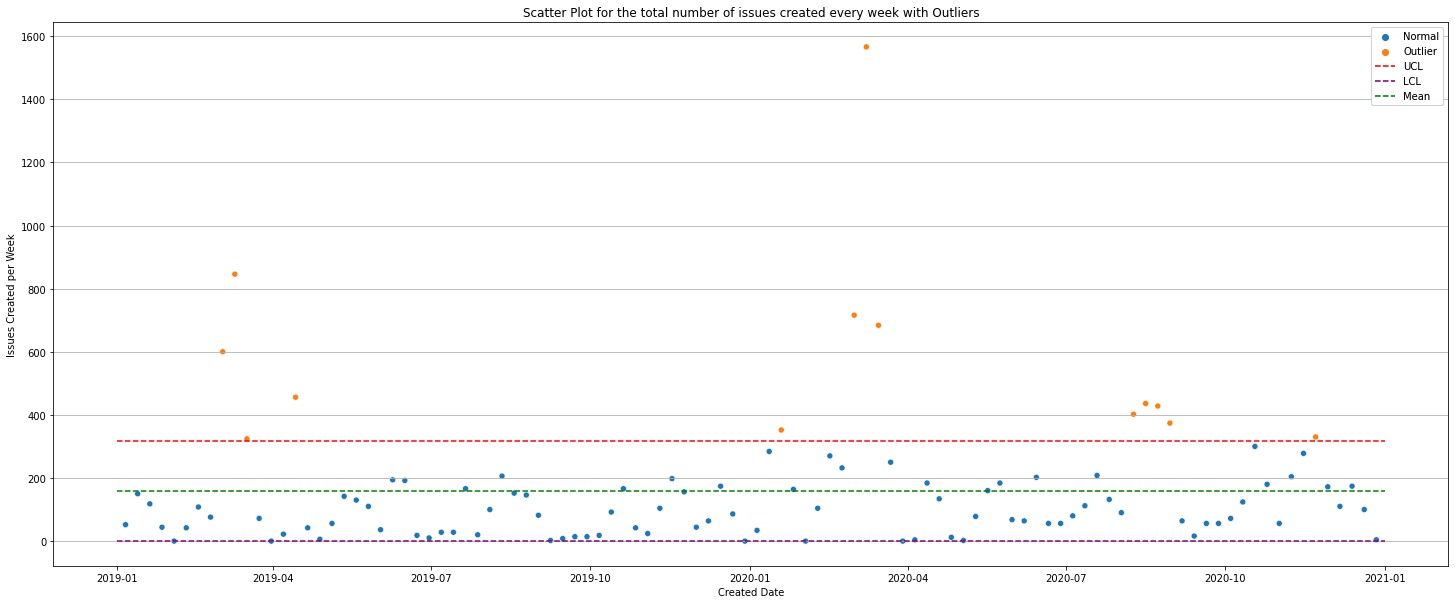

In [23]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()
sns.scatterplot(x="created_at",
                y="issue_number",
                data=df1_Analysis_created_resample.reset_index(),
                hue='status',
                ax=ax)
ax.grid(b=True, which='major', axis='y')
ax.set(xlabel="Created Date", ylabel="Issues Created per Week",
      title="Scatter Plot for the total number of issues created every week with Outliers")
left, right = plt.xlim()
plt.hlines(UCL_Analysis_created, ax.get_xticks().min(), ax.get_xticks().max(), linestyle='--', color='red', label='UCL')
plt.hlines(max(LCL_Analysis_created,0), ax.get_xticks().min(), ax.get_xticks().max(), linestyle='--', color='purple', label='LCL')
plt.hlines(vMean_Analysis_created, ax.get_xticks().min(), ax.get_xticks().max(), linestyle='--', color='green', label='Mean')
leg1 = ax.legend()
ax.add_artist(leg1)

**Figure - 1**

**Ans :** According to the above figure maximum number of issuses were created in the Month of March in the year of 2019 and 2020. After March 2020 created issue rate were declining which indicates a good software project process.

**2) What are the UCL (Upper Control Limit) and LCL (Lower Control Limit) for certain issue metrics?**

In [24]:
created_at = f'UCL for created date issue metric is {UCL_Analysis_created} and LCL is {LCL_Analysis_created} (Normalized LCL would be={max(LCL_Analysis_created, 0)})'
closed_at = f'UCL for closed date issue metric is {UCL_Analysis_closed} and LCL is {LCL_Analysis_closed} (Normalized LCL would be={max(LCL_Analysis_closed, 0)})'
print(created_at)
print(closed_at)

UCL for created date issue metric is 318.0 and LCL is -114.0 (Normalized LCL would be=0)
UCL for closed date issue metric is 174.0 and LCL is -60.0 (Normalized LCL would be=0)


**3) Can the outliers detect hidden problems in the given dataset?**

In [25]:
df3_analysis = df[['issue_number', 'created_at', 'closed_at']]
df3_analysis['created_at'] = pd.to_datetime(df['created_at'])
df3_analysis['closed_at'] = pd.to_datetime(df['closed_at'])
df3_analysis['days_to_close'] = df3_analysis['closed_at'] - df3_analysis['created_at']
df3_analysis['days_to_close_count'] = df3_analysis['days_to_close'].dt.days
nat = np.datetime64('NaT')
np.isnat(nat)
df3_analysis['issue_status'] = df3_analysis.apply(lambda x: 'Open' if x['closed_at'] is pd.NaT else 'Closed', axis=1)
df3_analysis

issue_number created_at  ... days_to_close_count issue_status
0                 1 2019-02-24  ...                 NaN         Open
1                 2 2019-02-25  ...                 NaN         Open
2                 3 2019-02-26  ...                 9.0       Closed
3                 4 2019-02-27  ...                 9.0       Closed
4                 5 2019-02-28  ...                 NaN         Open
...             ...        ...  ...                 ...          ...
16393         16394 2019-02-14  ...                 NaN         Open
16394         16395 2019-02-15  ...                22.0       Closed
16395         16396 2019-02-16  ...                 NaN         Open
16396         16397 2019-02-17  ...                22.0       Closed
16397         16398 2019-02-18  ...                22.0       Closed

[16398 rows x 6 columns]

In [26]:
df3_analysis_summary = df3_analysis['days_to_close'].dt.days.to_frame().describe()
v1_analysis = df3_analysis_summary.loc['25%']['days_to_close']
v2_analysis = df3_analysis_summary.loc['50%']['days_to_close']
v3_analysis = df3_analysis_summary.loc['75%']['days_to_close']
mean_analysis = df3_analysis_summary.loc['mean']['days_to_close']
IQR_analysis = v3_analysis - v1_analysis
UCL_analysis = v2_analysis + 1.5 * IQR_analysis
LCL_analysis = v2_analysis - 1.5 * IQR_analysis

df3_analysis['status_outlier'] = df3_analysis.apply(lambda x: define_outliers(x['days_to_close_count'], LCL_analysis, UCL_analysis), axis=1)
df3_analysis

issue_number created_at  ... issue_status status_outlier
0                 1 2019-02-24  ...         Open         Normal
1                 2 2019-02-25  ...         Open         Normal
2                 3 2019-02-26  ...       Closed         Normal
3                 4 2019-02-27  ...       Closed         Normal
4                 5 2019-02-28  ...         Open         Normal
...             ...        ...  ...          ...            ...
16393         16394 2019-02-14  ...         Open         Normal
16394         16395 2019-02-15  ...       Closed         Normal
16395         16396 2019-02-16  ...         Open         Normal
16396         16397 2019-02-17  ...       Closed         Normal
16397         16398 2019-02-18  ...       Closed         Normal

[16398 rows x 7 columns]

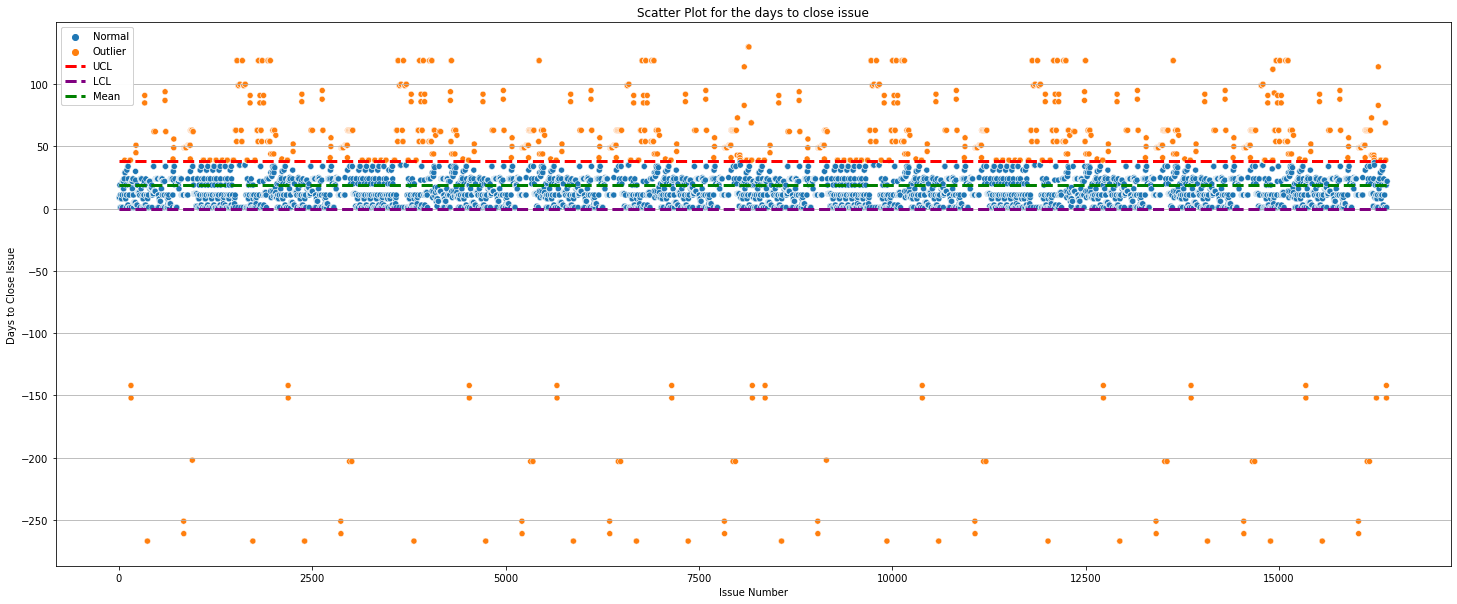

In [27]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()
sns.scatterplot(x="issue_number",
          y="days_to_close_count",
          data=df3_analysis.reset_index(),
          hue='status_outlier',
          ax=ax)
ax.grid(b=True, which='major', axis='y')
ax.set(xlabel="Issue Number", ylabel="Days to Close Issue",
      title="Scatter Plot for the days to close issue")
left, right = plt.xlim()
left = 0
right = df3_analysis.shape[0]
plt.hlines(UCL_analysis, left, right, linestyle='--', lw=3, color='red', label='UCL')
plt.hlines(max(LCL_analysis, 0), left, right, linestyle='--', lw=3, color='purple', label='LCL')
plt.hlines(mean_analysis, left, right, linestyle='--', lw=3, color='green', label='Mean')
leg1 = ax.legend()
ax.add_artist(leg1)

**Ans : YES**
- Outliers means the data points having significantly higher or lower values.
- As we can see in the above figure, we can calulate the duration to close each issue.
- From the description we have mean as 19.405473 days to close a issue and UCL = 38.0 days and LCL = -10.0 days (normalized LCL would be = 0 days).
- The issues having negative data points are considered as a wrong data points because for them the created date is greater than the closed date. This is one of the hiddern problem.
- The issues which required extra efforts were maked as a yellow outliers.

**4) What is the correlation between outliers and hidden problems in the given dataset?**

As we have seen in the Question-3,
- The issues having negative data points are considered as a wrong data points because for them the created date is greater than the closed date. This is one of the hiddern problem.
- The issues which required extra efforts were maked as a yellow outliers.
- This is the correlation between outliers and hidden problems.

**5) How to detect if there is problem hidden in the given dataset?**

Data analysis, visualization, detection of the outliers will help to identify a hidden problem within a dataset.

**6) How to detect if certain engineer deliberately creates issues with Priority Critical?**

In [28]:
df6_analysis_critical = df.loc[df['Priority'] == 'Critical'].reset_index().drop(columns=['index'])
df6_analysis_critical = df6_analysis_critical.groupby(['Author']).issue_number.count().to_frame()
df6_analysis_critical.head()

issue_number
Author                             
Abbott, Theresia                  2
Abbott, Werner                    9
Abernathy, Georgianna             2
Abshire, Giles                    4
Abshire, Ivy                      2

In [29]:
df6 = df.groupby(['Author', 'Priority']).issue_number.count().unstack().fillna(0)
df6['Total'] = df6.sum(axis=1)

In [30]:
df6_author_summary = df6['Total'].to_frame().describe()
v1_analysis_author = df6_author_summary.loc['25%']['Total']
v2_analysis_author = df6_author_summary.loc['50%']['Total']
v3_analysis_author = df6_author_summary.loc['75%']['Total']
mean_analysis_author = df6_author_summary.loc['mean']['Total']
IQR_analysis_author = v3_analysis_author - v1_analysis_author
UCL_analysis_author = v2_analysis_author + 1.5 * IQR_analysis_author
LCL_analysis_author = v2_analysis_author - 1.5 * IQR_analysis_author
df6_author_summary

Total
count  1243.000000
mean     13.192277
std      12.346939
min       1.000000
25%       7.000000
50%      10.000000
75%      16.000000
max     286.000000

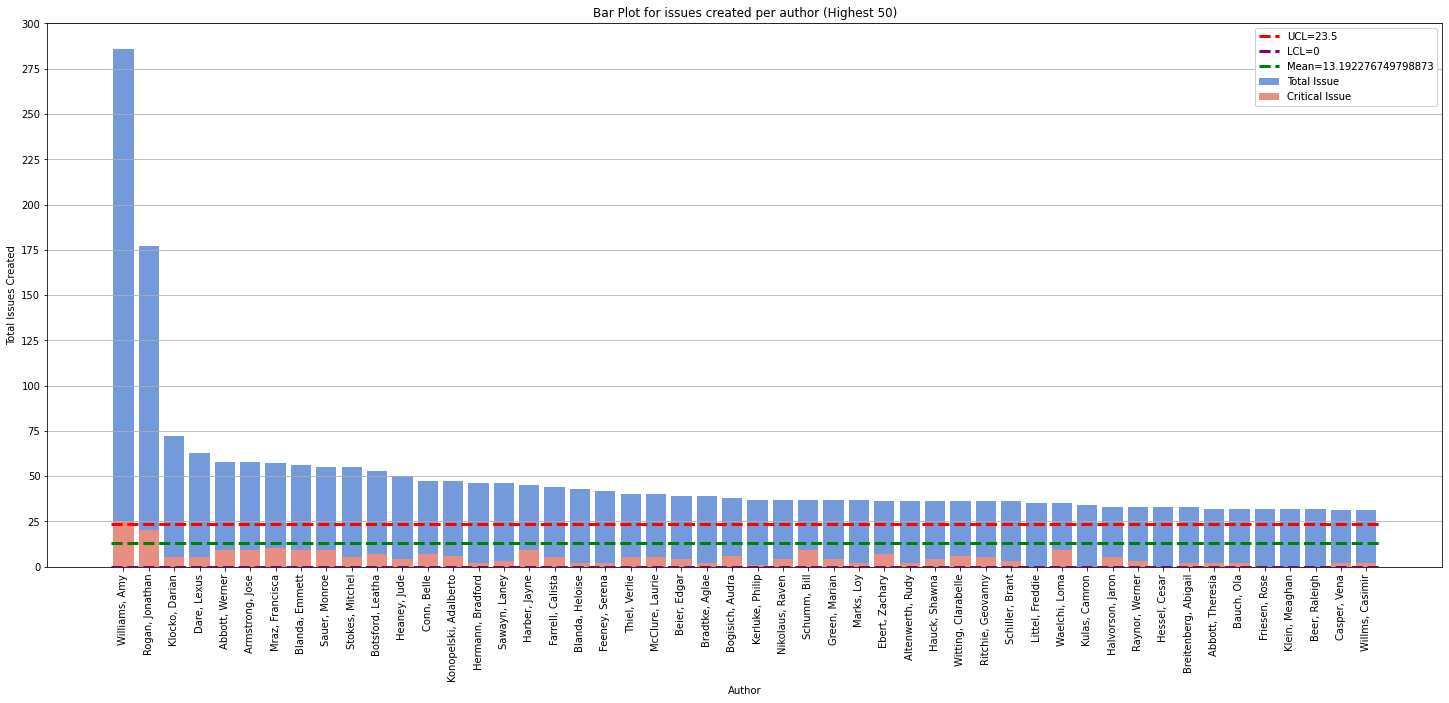

In [31]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()
highest_count = 50
fig_data = df6.sort_values("Total", ascending=False).head(highest_count)

g = sns.barplot(x="Author"
            , y="Total"
            , data=fig_data.reset_index()
            , label="Total Issue"
            , color="cornflowerblue"
            , ax=ax)

g_critical = sns.barplot(x="Author"
                        , y="Critical"
                        , data=fig_data.reset_index()
                        , label="Critical Issue"
                        , color="salmon"
                        , ax=ax)

ax.legend(ncol=2, frameon=True)
ax.grid(b=True, which='major', axis='y')
ax.set(xlabel="Author", ylabel="Total Issues Created",
      title=f"Bar Plot for issues created per author (Highest {highest_count})")
left, right = plt.xlim()
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_tick_params(rotation=90)
plt.hlines(UCL_analysis_author, left, right, linestyle='--', lw=3, color='red', label=f'UCL={UCL_analysis_author}')
plt.hlines(max(LCL_analysis_author, 0), left, right, linestyle='--', lw=3, color='purple', label=f'LCL={max(LCL_analysis_author, 0)}')
plt.hlines(mean_analysis_author, left, right, linestyle='--', lw=3, color='green', label=f'Mean={mean_analysis_author}')
leg1 = ax.legend()
ax.add_artist(leg1)

**Ans :** As we can see in the above figure, williams has created maximum number of issues but critical issues are very less compared to the total issues created by him. So, we can say that he has not created the issues deliberately.

**7) How to detect if certain origination phase causes majority of the in progress- Critical-Bug issues?**

[Text(0, 0.5, 'Total Issues Created'),
 Text(0.5, 0, 'Origination Phase'),
 Text(0.5, 1.0, 'Pivot Chart the total number of issue status created for every OriginationPhase')]

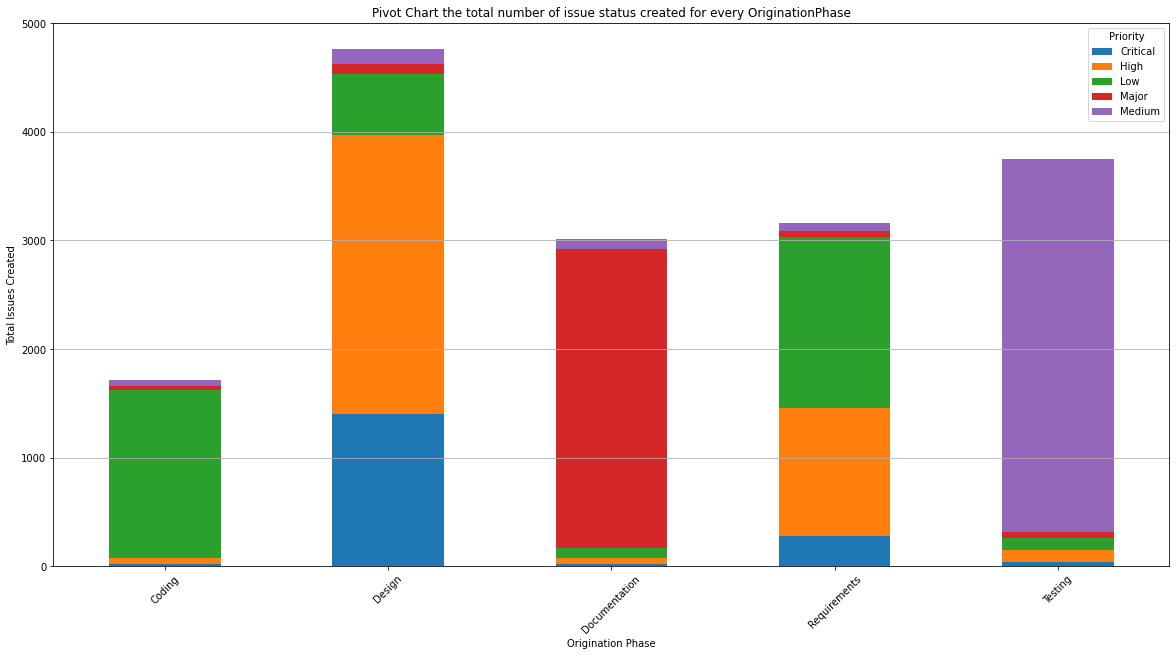

In [32]:
df7 = df.groupby(['OriginationPhase', 'Priority']).created_at.count().unstack()

ax = df7.plot(kind='bar', stacked=True, figsize=(20,10), rot=45)
ax.grid(b=True,which='major',axis='y')
ax.set(xlabel="Origination Phase", ylabel="Total Issues Created",
        title="Pivot Chart the total number of issue status created for every OriginationPhase")

**Ans :** As we can see in the above figure, critical issues were generated only in design and requirement phase. So, we can say that these both phase causes majority of the in progress- Critical-Bug issues.

**8) Can you chart the patterns of outliers in the dataset?**

Find **figure - 1** from the **question - 1** of "analysis reports" part.

**9) Can you create the right pivot stackedbar chart?**

Find **figure - 1** from **question - 5** of "Issues Tracking and Report Design" part.

**10) How to group multi-levels? Group by Origination phase or Category for example.**

[Text(0, 0.5, 'Total Issues Created'),
 Text(0.5, 0, 'Origination Phase'),
 Text(0.5, 1.0, 'Pivot Chart the total number of issue category created for every OriginationPhase')]

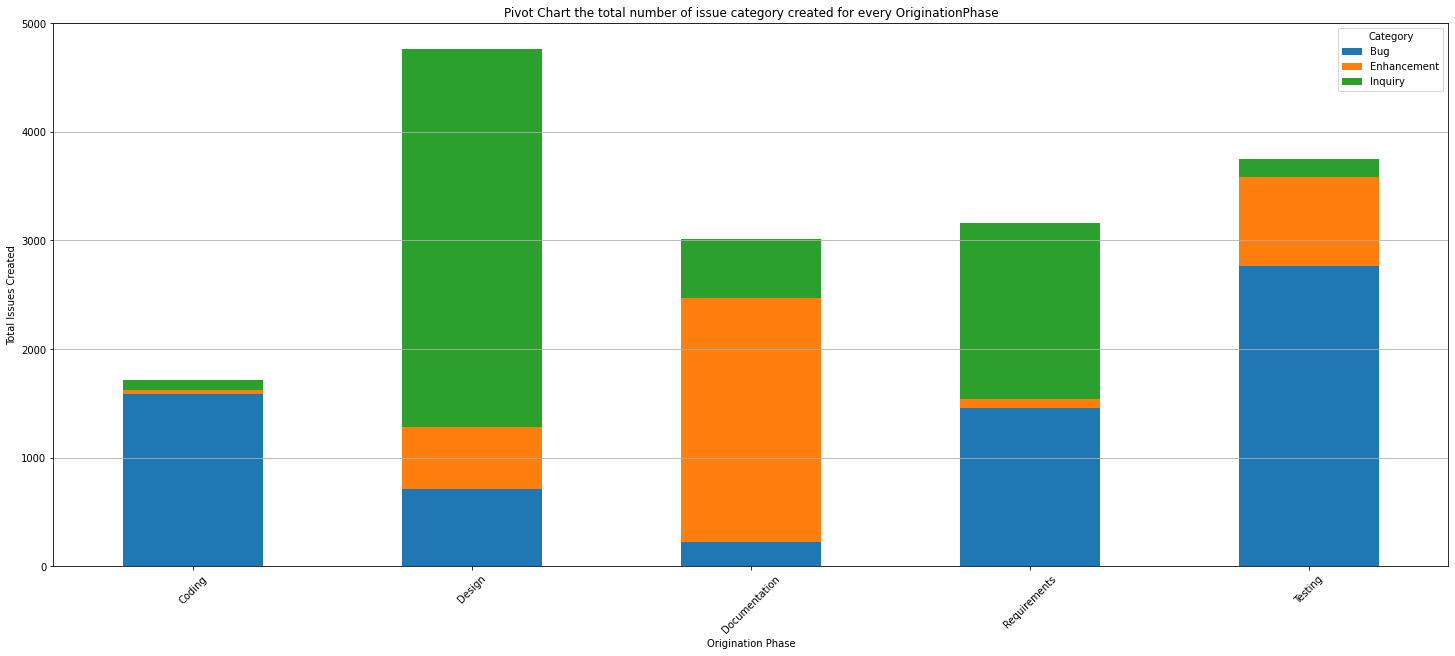

In [33]:
df10 = df.groupby(['OriginationPhase', 'Category']).created_at.count().unstack()

ax = df10.plot(kind='bar', stacked=True, figsize=(25,10), rot=45)
ax.grid(b=True,which='major',axis='y')
ax.set(xlabel="Origination Phase", ylabel="Total Issues Created",
        title="Pivot Chart the total number of issue category created for every OriginationPhase")

**11) How many Levels of indexing? Should the Priority be displayed in a pivotchart of DetectionPhase for example**

[Text(0, 0.5, 'Total Issues Priority Created'),
 Text(0.5, 0, 'DetectionPhase'),
 Text(0.5, 1.0, 'Pivot Chart the total number of issue priority created for every Detection Phase')]

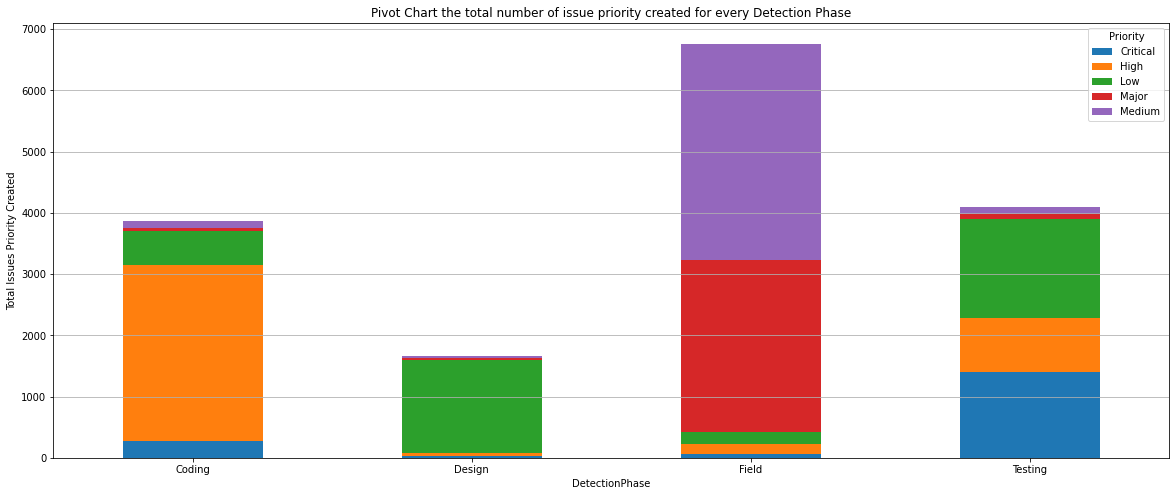

In [34]:
df11 = df.groupby(['DetectionPhase', 'Priority']).created_at.count().unstack()

ax = df11.plot(kind='bar', stacked=True, figsize=(20,8), rot=0)
ax.grid(b=True,which='major',axis='y')
ax.set(xlabel="DetectionPhase", ylabel="Total Issues Priority Created",
        title="Pivot Chart the total number of issue priority created for every Detection Phase")

There are two levels of indexing; primary and secondary. Primary indexing has a two types dense and sparse indexing.

**12) What is the avg number of issues opened per DetectionPhase?**

In [35]:
def dataframe_for_avg_calculation():
  df12_analysis = df.copy()
  df12_analysis['created_at'] = pd.to_datetime(df['created_at'])
  df12_analysis['closed_at'] = pd.to_datetime(df['closed_at'])
  df12_analysis['days_to_close'] = df12_analysis['closed_at'] - df12_analysis['created_at']
  df12_analysis['days_to_close_count'] = df12_analysis['days_to_close'].dt.days
  nat = np.datetime64('NaT')
  np.isnat(nat)
  df12_analysis['issue_status'] = df12_analysis.apply(lambda x: 'Open' if x['closed_at'] is pd.NaT else 'Closed', axis=1)
  return df12_analysis

dataframe_for_avg_calculation()

issue_number OriginationPhase  ... days_to_close_count issue_status
0                 1     Requirements  ...                 NaN         Open
1                 2           Design  ...                 NaN         Open
2                 3     Requirements  ...                 9.0       Closed
3                 4          Testing  ...                 9.0       Closed
4                 5    Documentation  ...                 NaN         Open
...             ...              ...  ...                 ...          ...
16393         16394          Testing  ...                 NaN         Open
16394         16395    Documentation  ...                22.0       Closed
16395         16396           Design  ...                 NaN         Open
16396         16397           Design  ...                22.0       Closed
16397         16398     Requirements  ...                22.0       Closed

[16398 rows x 12 columns]

In [36]:
df12_analysis = dataframe_for_avg_calculation().copy()
# df12_analysis = df12_analysis.loc[df12_analysis["issue_status"] == "Open"]
df12_analysis = df12_analysis.groupby('DetectionPhase').created_at.count()
df12_analysis.describe()

count       4.000000
mean     4099.500000
std      2089.357557
min      1660.000000
25%      3320.500000
50%      3987.500000
75%      4766.500000
max      6763.000000
Name: created_at, dtype: float64

**Ans :** Average number of issues opened per DetectionPhase is 4099.5.

**13) What is the avg turn around time per issue (time from the day the issue created till it got closed)?**

In [37]:
df13_analysis = dataframe_for_avg_calculation().copy()
df13_analysis['days_to_close_count'].describe()

count    8405.000000
mean       19.405473
std        34.349971
min      -267.000000
25%         8.000000
50%        14.000000
75%        24.000000
max       130.000000
Name: days_to_close_count, dtype: float64

**Ans :** Average turn around time per issue is 19.405473.

**14) What is the avg number of rejected issues opened per eningeer?**

In [38]:
df14_analysis = dataframe_for_avg_calculation().copy()
df14_analysis = df14_analysis.loc[(df14_analysis['Status'] == 'Rejected')].sort_values(by=['Author'], ascending=True)
df14_analysis = df14_analysis.groupby('Author')['issue_number'].count()
df14_analysis.describe()

count    701.000000
mean       2.793153
std        2.170256
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       37.000000
Name: issue_number, dtype: float64

**Ans :** Average number of rejected issues opened per eningeer is 2.793153.

**15) What is the avg number of critical issues opened per eningeer?**

In [39]:
df15_analysis = dataframe_for_avg_calculation().copy()
df15_analysis = df15_analysis.loc[(df15_analysis['Priority'] == 'Critical')]
df15_analysis = df15_analysis.groupby('Author')['issue_number'].count()
df15_analysis.describe()

count    670.000000
mean       2.638806
std        1.851187
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       25.000000
Name: issue_number, dtype: float64

**Ans :** Average number of critical issues opened per eningeer is 2.638806.

**16) What is the avg number of rejected issues per OriginationPhase?**

In [40]:
df16_analysis = dataframe_for_avg_calculation().copy()
df16_analysis = df16_analysis.loc[(df16_analysis['Status'] == 'Rejected')]
df16_analysis = df16_analysis.groupby('OriginationPhase')['issue_number'].count()
df16_analysis.describe()

count      5.000000
mean     391.600000
std      287.465302
min      141.000000
25%      250.000000
50%      308.000000
75%      377.000000
max      882.000000
Name: issue_number, dtype: float64

**Ans :** Average number of rejected issues per OriginationPhase is 391.6.

**17) What is the avg number of critical issues per OriginationPhase?**

In [41]:
df17_analysis = dataframe_for_avg_calculation().copy()
df17_analysis = df17_analysis.loc[(df17_analysis['Priority'] == 'Critical')]
df17_analysis = df17_analysis.groupby('OriginationPhase')['issue_number'].count()
df17_analysis.describe()

count       5.000000
mean      353.600000
std       597.848058
min        22.000000
25%        24.000000
50%        37.000000
75%       280.000000
max      1405.000000
Name: issue_number, dtype: float64

**Ans :**Average number of critical issues per OriginationPhase is 353.6.

**18) What is the avg number of created issues per OriginationPhase?**

In [42]:
df18_analysis = dataframe_for_avg_calculation().copy()
df18_analysis = df18_analysis.groupby('OriginationPhase')['issue_number'].count()
df18_analysis.describe()

count       5.000000
mean     3279.600000
std      1115.636276
min      1712.000000
25%      3010.000000
50%      3157.000000
75%      3753.000000
max      4766.000000
Name: issue_number, dtype: float64

**Ans :** Average number of created issues per OriginationPhase is 3279.6.

**19) What is the avg number of rejected critical issues per OriginationPhase?**

In [43]:
df19_analysis = dataframe_for_avg_calculation().copy()
df19_analysis = df19_analysis.loc[(df19_analysis['Priority'] == 'Critical') & (df19_analysis['Status'] == 'Rejected')]
df19_analysis = df19_analysis.groupby('OriginationPhase')['issue_number'].count()
df19_analysis.describe()

count     5.000000
mean     20.800000
std      36.203591
min       2.000000
25%       2.000000
50%       2.000000
75%      13.000000
max      85.000000
Name: issue_number, dtype: float64

**Ans :** Average number of rejected critical issues per OriginationPhase is 20.8.

**20) What is the ratio of total number of critical to medium issues per OriginationPhase?**

In [44]:
df20_analysis = df[['OriginationPhase', 'Priority']]
df20_analysis = df20_analysis.loc[(df20_analysis['Priority'] == 'Critical') | (df20_analysis['Priority'] == 'Medium')]
df20_analysis = df20_analysis.groupby(['OriginationPhase', 'Priority'])['Priority'].count().to_frame(name='count').unstack()
df20_analysis = df20_analysis['count']
df20_analysis['Ratio (Critical to Medium)'] = df20_analysis['Critical'] / df20_analysis['Medium']
df20_analysis

Priority          Critical  Medium  Ratio (Critical to Medium)
OriginationPhase                                              
Coding                  24      49                    0.489796
Design                1405     145                    9.689655
Documentation           22      86                    0.255814
Requirements           280      73                    3.835616
Testing                 37    3439                    0.010759

**21) Which month got the maximum number of Critical issues created?**

In [45]:
df21_analysis = df.loc[df['Priority'] == 'Critical'][['created_at']]
df21_analysis['created_at'] = pd.to_datetime(df21_analysis['created_at'])
df21_analysis = df21_analysis.resample('M', on='created_at').count()
df21_analysis = df21_analysis[df21_analysis['created_at'] == df21_analysis['created_at'].max()]
df21_analysis

created_at
created_at            
2020-03-31         364

**Ans :** According to the above metric, maximum number of Critical issues created in **March** month.

**22) Which week got the minimum number of issues created?**

In [46]:
df22_analysis = df[['created_at']]
df22_analysis['created_at'] = pd.to_datetime(df22_analysis['created_at'])
df22_analysis = df22_analysis.resample('W', on='created_at').count()
df22_analysis = df22_analysis[df22_analysis['created_at'] > 0]
df22_analysis = df22_analysis[df22_analysis['created_at'] == df22_analysis['created_at'].min()]
df22_analysis

created_at
created_at            
2019-09-08           2
2020-05-03           2

**Ans :** According to the above metric, minimum number of issues created in **September** month.

# **Experiment #1**

# **Use Python and Facebook/Prophet package (https://facebook.github.io/prophet/docs/quick_start.html) to forecast the following based on the provided dataset**

**For Created Issues**

In [47]:
df_fb_created = df[['created_at', 'issue_number']]
df_fb_created['created_at'] = pd.to_datetime(df_fb_created['created_at'])
df_fb_created = df_fb_created.groupby('created_at').count().reset_index()
df_fb_created = df_fb_created.rename(columns={'created_at':'ds', 'issue_number':'y'})
df_fb_created.head()

ds   y
0 2019-01-05  26
1 2019-01-06  26
2 2019-01-07  26
3 2019-01-08  26
4 2019-01-09  26

In [48]:
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
model.fit(df_fb_created)
future_dates = model.make_future_dataframe(periods=50, freq='W')
forecast_created = model.predict(future_dates)

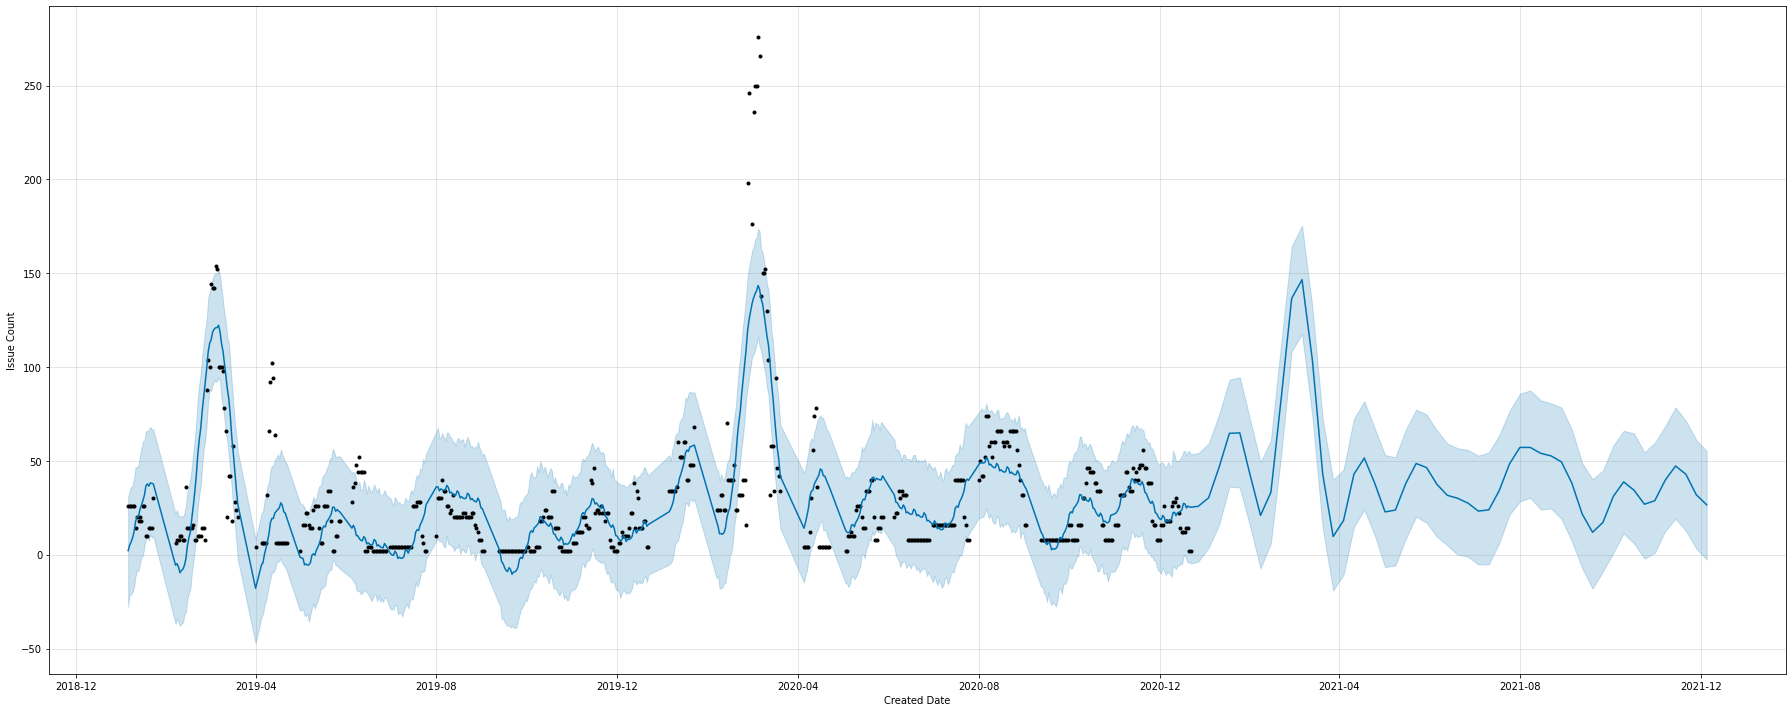

In [49]:
model.plot(forecast_created, xlabel='Created Date', ylabel='Issue Count', figsize=(25,10));

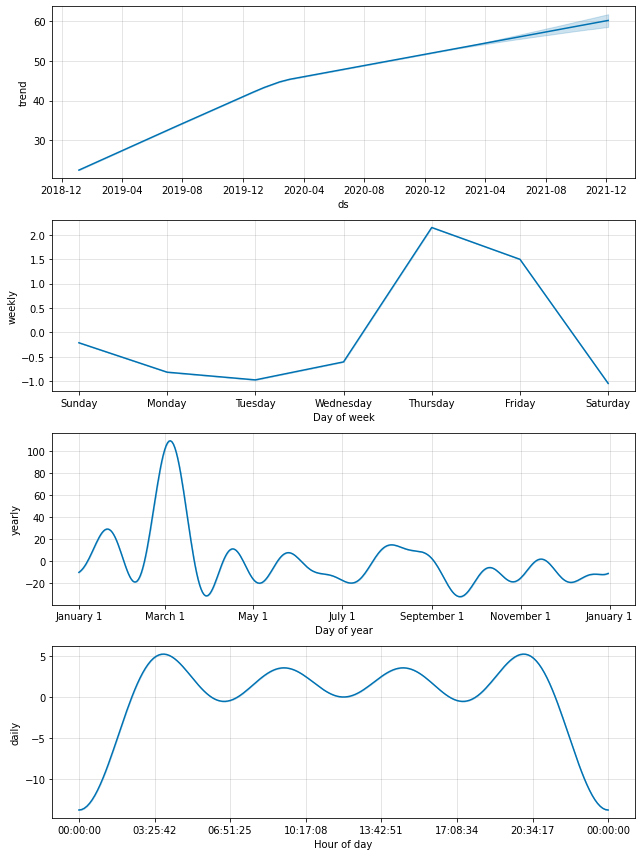

In [50]:
model.plot_components(forecast_created);

**For Closed Issues**

In [51]:
df_fb_closed = df[['closed_at', 'issue_number']]
df_fb_closed['closed_at'] = pd.to_datetime(df_fb_closed['closed_at'])
df_fb_closed = df_fb_closed.groupby('closed_at').count().reset_index()
df_fb_closed = df_fb_closed.rename(columns={'closed_at':'ds', 'issue_number':'y'})
df_fb_closed.head()

ds   y
0 2019-02-12   2
1 2019-02-15  10
2 2019-02-18  26
3 2019-03-03  80
4 2019-03-04   6

In [52]:
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
model.fit(df_fb_closed)
future_dates_closed = model.make_future_dataframe(periods=50, freq='W')
forecast_closed = model.predict(future_dates_closed)

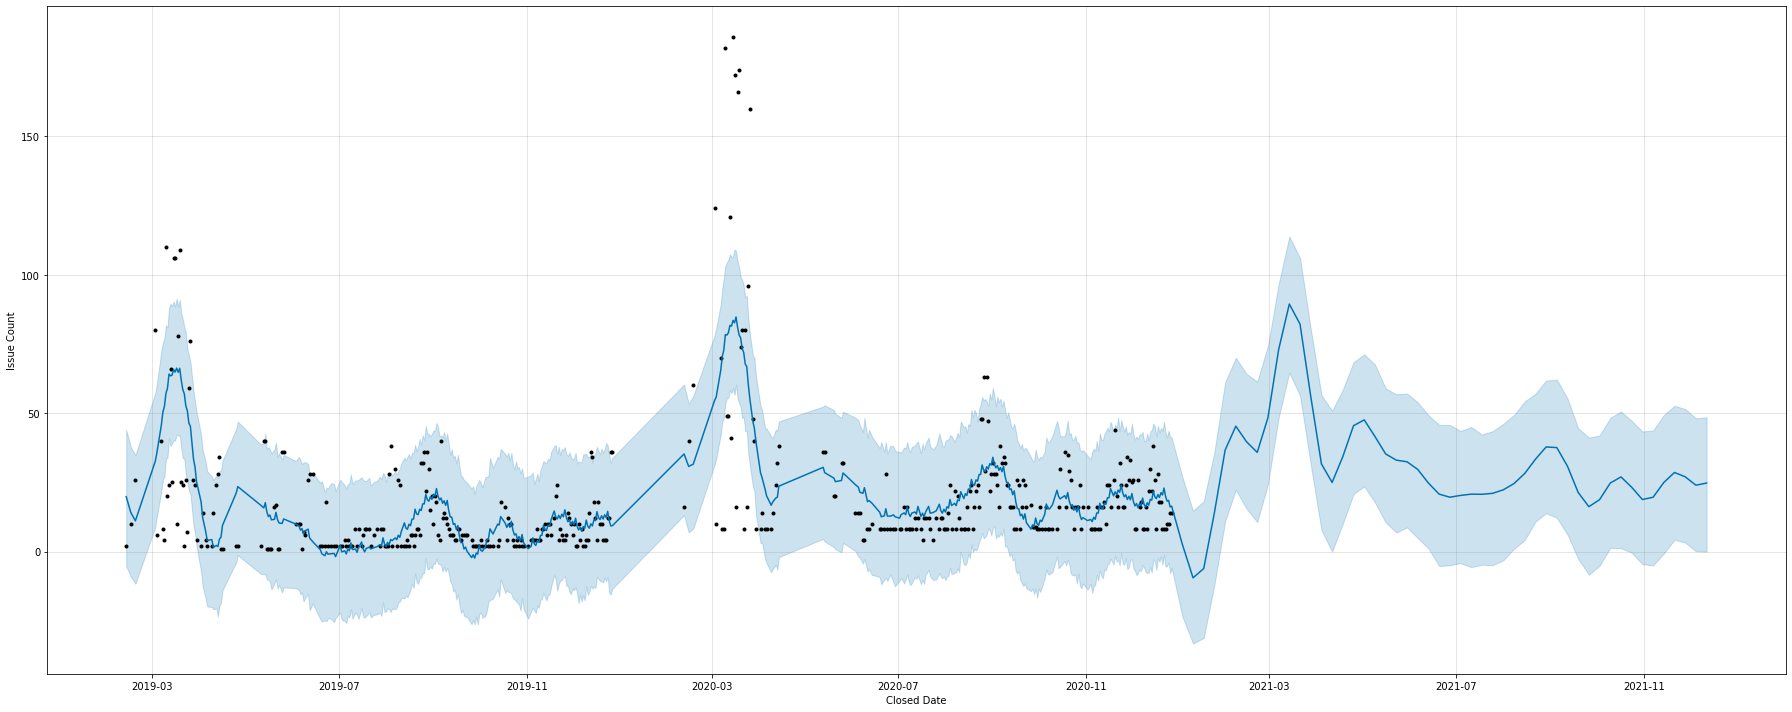

In [53]:
model.plot(forecast_closed, xlabel='Closed Date', ylabel='Issue Count', figsize=(25,10));

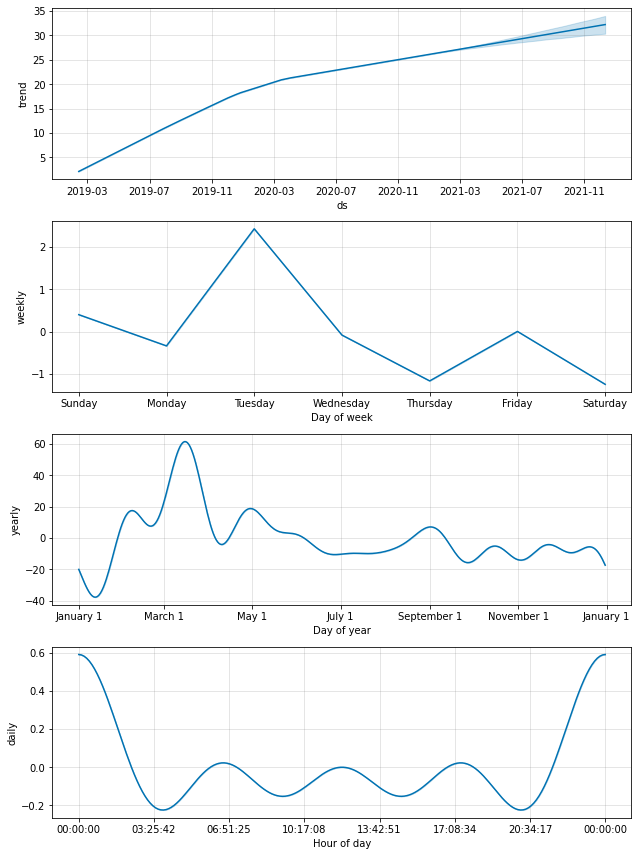

In [54]:
model.plot_components(forecast_closed);

**1) The day of the week maximum number of issues created**

**Ans :** The day of the week maximum number of issues created is Thrusday

**2) The day of the week maximum number of issues closed**

**Ans :** The day of the week maximum number of issues closed is Tuesday

**3) The month of the year that has maximum number of issues closed**

**Ans :** The month of the year that has maximum number of issues closed is March

**4) Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.**

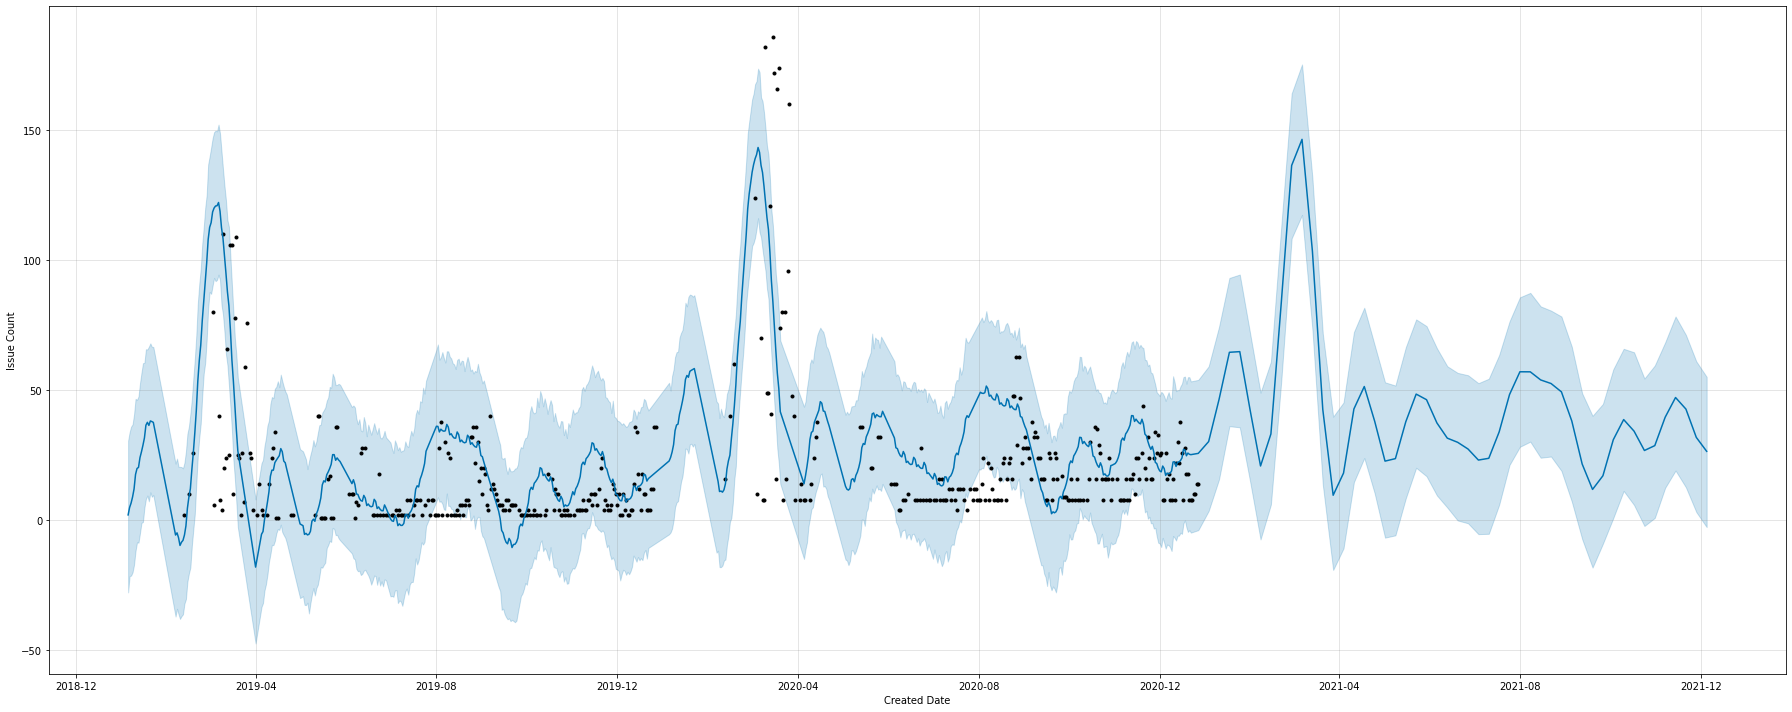

In [55]:
model.plot(forecast_created, xlabel='Created Date', ylabel='Issue Count', figsize=(25,10));

**5) Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.**

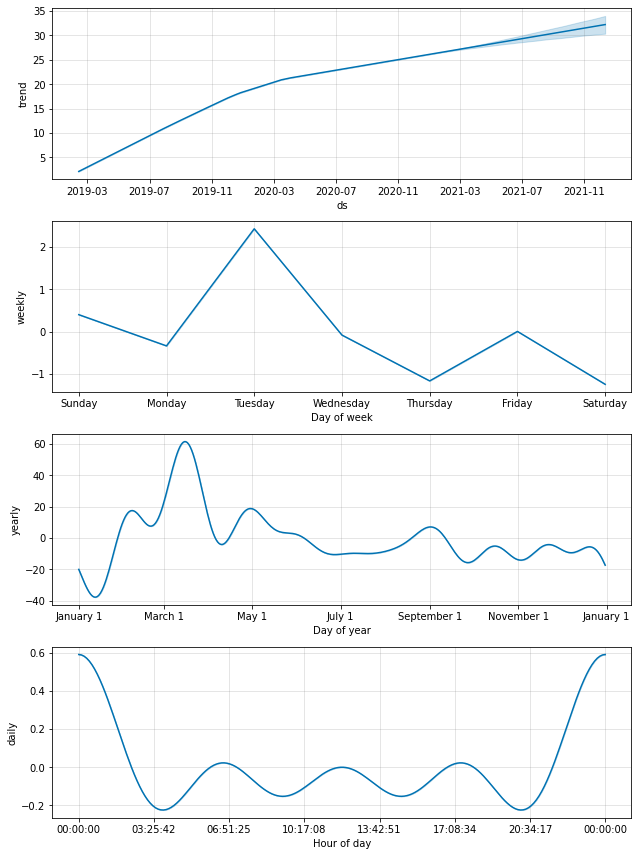

In [56]:
model.plot_components(forecast_closed);

**Mean Squared Error of Facebook/Prophet model**

In [57]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(df_fb_closed)
acc_for_prophet = mean_squared_error(y_pred['yhat'], df_fb_closed['y'])
print('Mean Squared Error :',acc_for_prophet)

Mean Squared Error : 359.9869859528251


# **Experiment #2**

# **Timeseries Forecasting using StateModels**

**4) Plot the created issues forecast.**

In [58]:
df_state_created = df_fb_created.copy()
df_state_created.head()

ds   y
0 2019-01-05  26
1 2019-01-06  26
2 2019-01-07  26
3 2019-01-08  26
4 2019-01-09  26

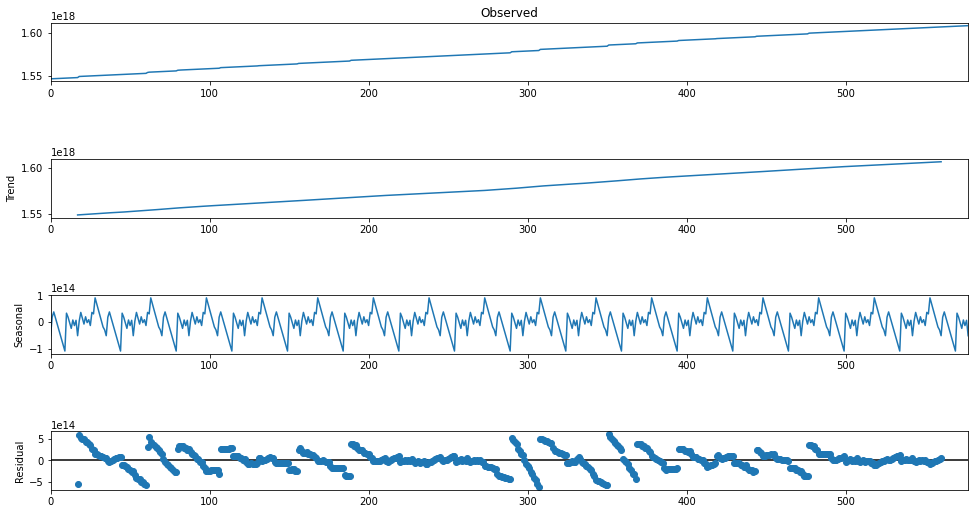

In [59]:
predict = sm.tsa.seasonal_decompose(df_state_created.set_index('ds').index, freq=35)
figure = predict.plot()
figure.set_size_inches(15, 8)

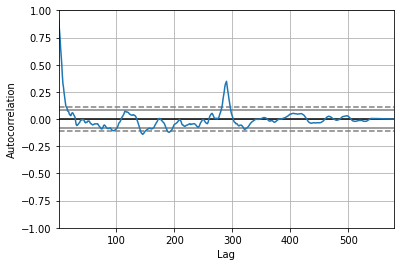

In [60]:
df_series_created = pd.Series(df_state_created['y'].values, index=df_state_created['ds'])
pd.plotting.autocorrelation_plot(pd.Series(df_series_created))
plt.show()

It can be seen that there is one significant value so p = 1

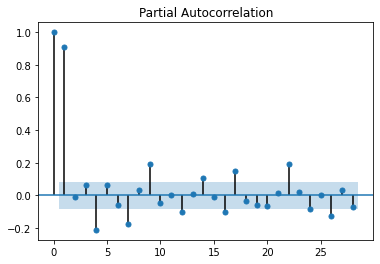

In [61]:
plot_pacf(df_series_created);

It can be seen that there is one significant value so q = 1

In [62]:
ndiffs(df_series_created, test='adf')

0

It can be seen that d = 0

In [63]:
df_stats_model_created = df_state_created.copy()
model_created = sm.tsa.ARIMA(df_stats_model_created['y'].iloc[1:], order = (1,0,1))
results = model_created.fit()

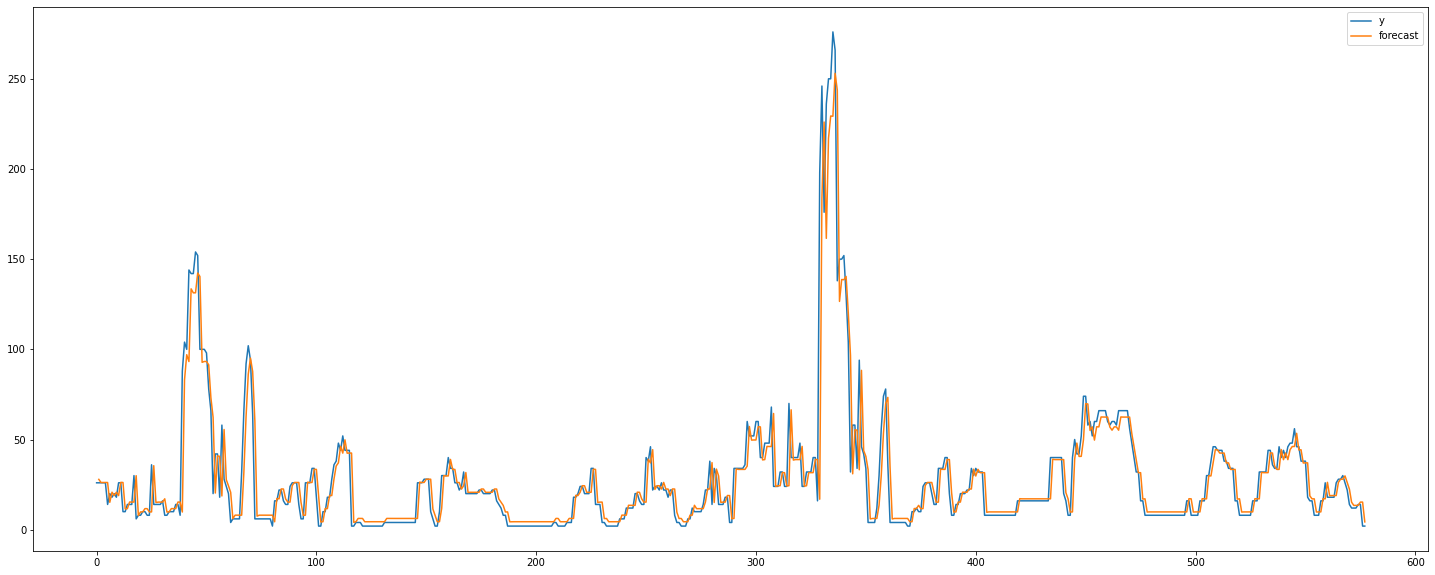

In [64]:
df_stats_model_created['forecast'] = results.fittedvalues
df_stats_model_created[['y', 'forecast']].plot(figsize=(25,10))

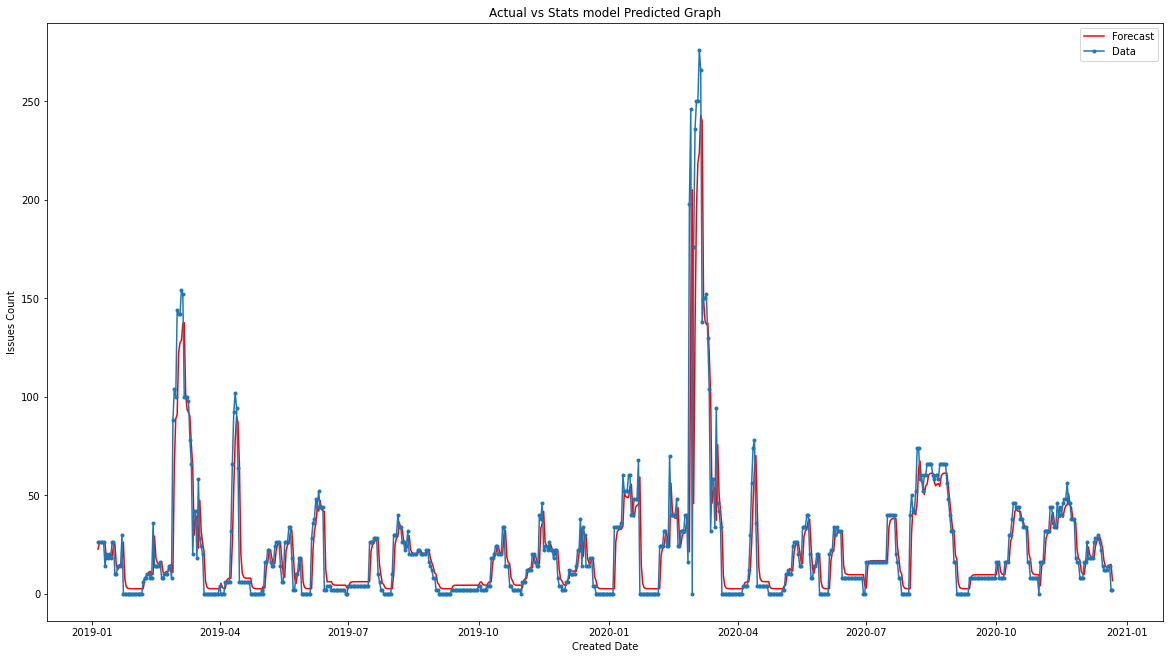

In [65]:
lzip = lambda *x:list(zip(*x))

days = df_state_created.groupby('ds')['ds'].value_counts()
Y = df_state_created['y'].values
X = lzip(*days.index.values)[0]
firstDay = min(X)

# To achieve data consistancy with both actual data and predicted values, I'm adding zeros to dates that do not have orders 
Ys = [0,]*((max(X) - firstDay).days + 1)#[firstDay + timedelta(days=day) for day in range((max(X) - firstDay).days + 1)]
days = pd.Series([firstDay + timedelta(days=i) for i in range(len(Ys))])
for x, y in zip(X, Y):
    Ys[(x - firstDay).days] = y
# parameters of the stats model is based on the below two graphs
est = sm.tsa.ARIMA(Ys, order=(1,0,1)).fit()
yHat = est.fittedvalues

fig, axs = plt.subplots(1, 1, figsize=(20, 11))
X = mdates.date2num(days)
axs.plot(X, yHat, c='red', label='Forecast')
axs.plot(X, Ys, marker='.', label='Data')
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.legend()
axs.set_title('Actual vs Stats model Predicted Graph')
axs.set_xlabel('Created Date')
axs.set_ylabel('Issues Count')
plt.show()

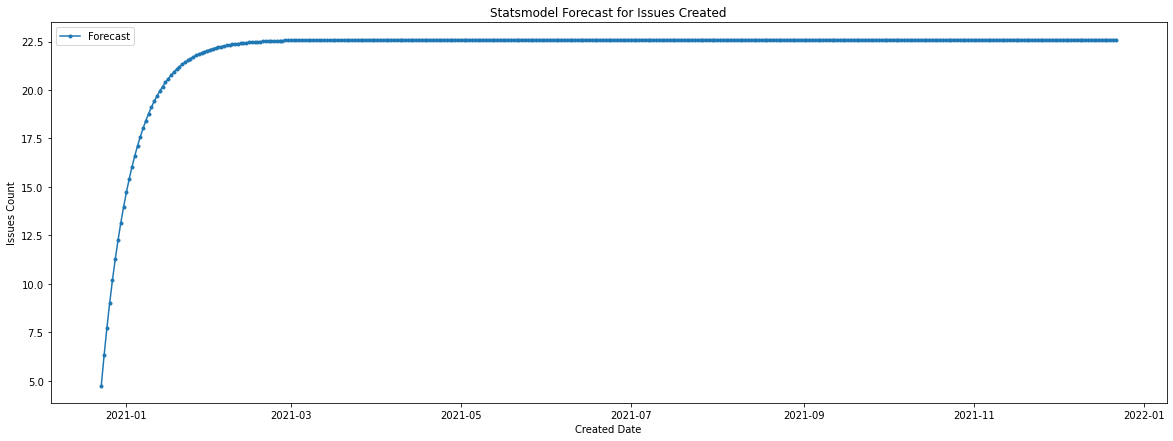

In [66]:
lastDay = max(df_state_created['ds'])
X = [lastDay + timedelta(days=i) for i in range(1, 365 + 1)]
weekday = pd.Series([x.weekday() for x in X])
X = mdates.date2num(X)
# Predict orders for future dates:
pred_fd = est.forecast(steps=365)
Y = pred_fd[0]

fig, axs = plt.subplots(1, 1, figsize=(20, 7))
axs.plot(X, Y, marker='.', label='Forecast')
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.legend()
axs.set_title('Statsmodel Forecast for Issues Created')
axs.set_xlabel('Created Date')
axs.set_ylabel('Issues Count')
plt.show()

**5) Plot the closed issues forecast.**

In [67]:
df_state_closed = df_fb_closed.copy()
df_state_closed.head()

ds   y
0 2019-02-12   2
1 2019-02-15  10
2 2019-02-18  26
3 2019-03-03  80
4 2019-03-04   6

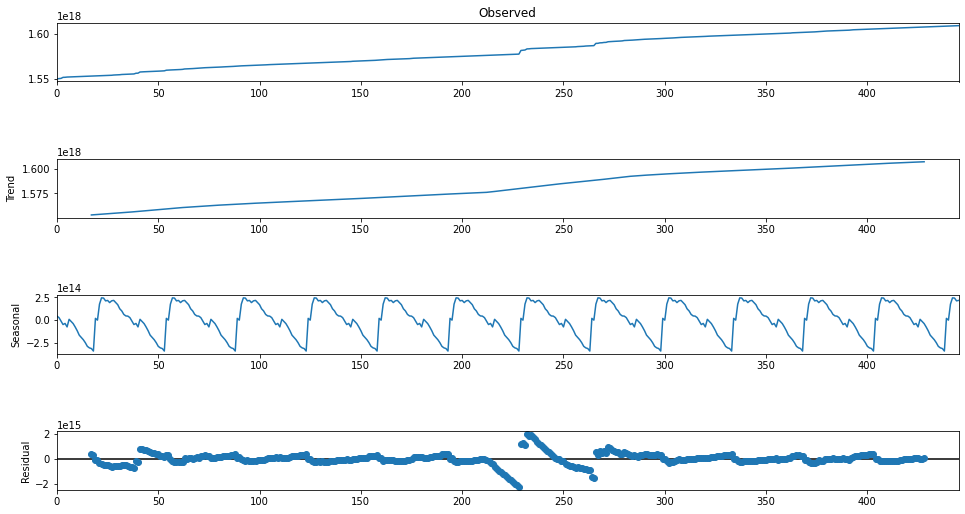

In [68]:
predict = sm.tsa.seasonal_decompose(df_state_closed.set_index('ds').index, freq=35)
figure = predict.plot()
figure.set_size_inches(15, 8)

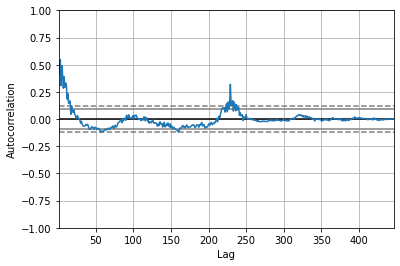

In [69]:
df_series_closed = pd.Series(df_state_closed['y'].values, index=df_state_closed['ds'])
pd.plotting.autocorrelation_plot(pd.Series(df_series_closed))
plt.show()

It can be seen that there is one significant value so p = 1

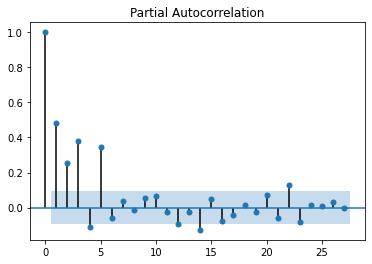

In [70]:
plot_pacf(df_series_closed);

It can be seen that there is one significant value so q = 1

In [71]:
ndiffs(df_series_closed, test='adf')

0

In [72]:
df_stats_model_closed = df_state_closed.copy()
model_closed = sm.tsa.ARIMA(df_stats_model_closed['y'].iloc[1:], order = (1,0,1))
results = model_closed.fit()

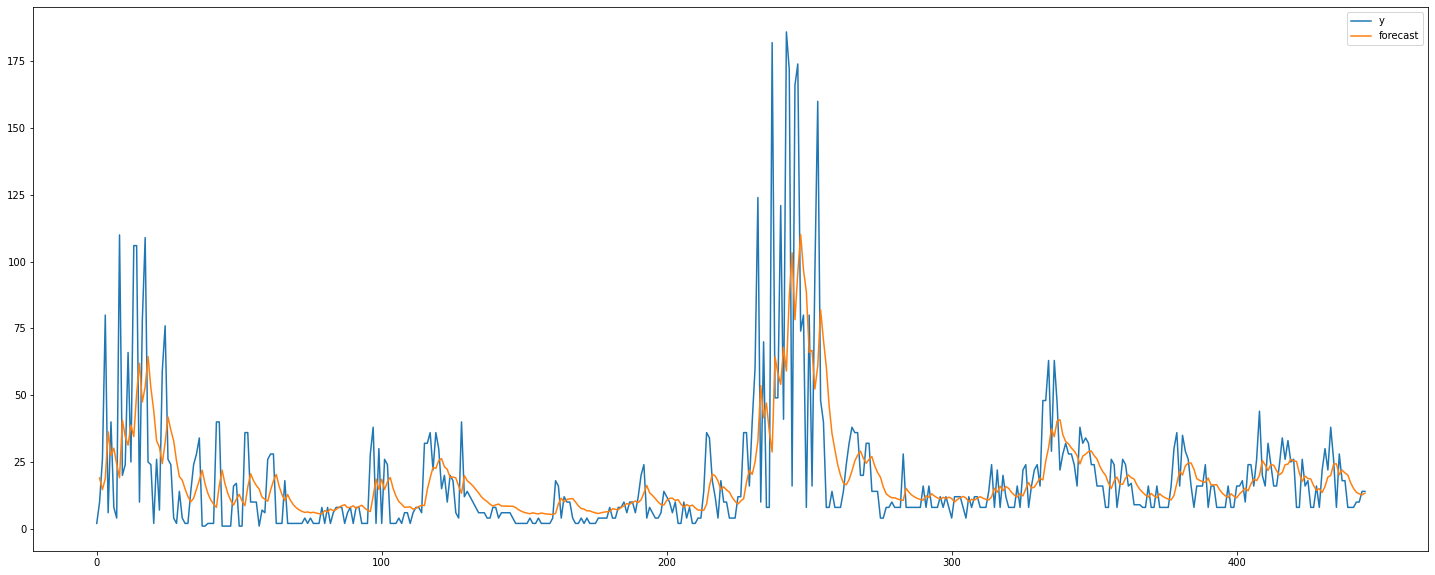

In [73]:
df_stats_model_closed['forecast'] = results.fittedvalues
df_stats_model_closed[['y', 'forecast']].plot(figsize=(25,10))

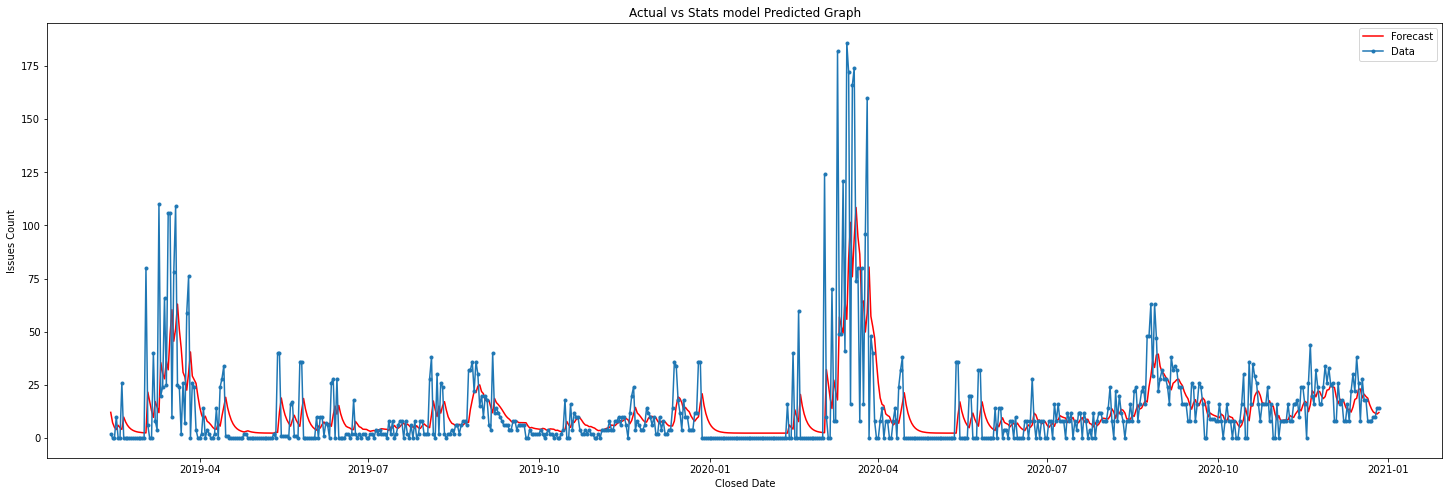

In [74]:
lzip = lambda *x:list(zip(*x))

days = df_state_closed.groupby('ds')['ds'].value_counts()
Y = df_state_closed['y'].values
X = lzip(*days.index.values)[0]
firstDay = min(X)

# To achieve data consistancy with both actual data and predicted values, I'm adding zeros to dates that do not have orders 
Ys = [0,]*((max(X) - firstDay).days + 1)#[firstDay + timedelta(days=day) for day in range((max(X) - firstDay).days + 1)]
days = pd.Series([firstDay + timedelta(days=i) for i in range(len(Ys))])
for x, y in zip(X, Y):
    Ys[(x - firstDay).days] = y
# parameters of the stats model is based on the below two graphs
est = sm.tsa.ARIMA(Ys, order=(1,0,1)).fit()
yHat = est.fittedvalues

fig, axs = plt.subplots(1, 1, figsize=(25, 8))
X = mdates.date2num(days)
axs.plot(X, yHat, c='red', label='Forecast')
axs.plot(X, Ys, marker='.', label='Data')
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.legend()
axs.set_title('Actual vs Stats model Predicted Graph')
axs.set_xlabel('Closed Date')
axs.set_ylabel('Issues Count')
plt.show()

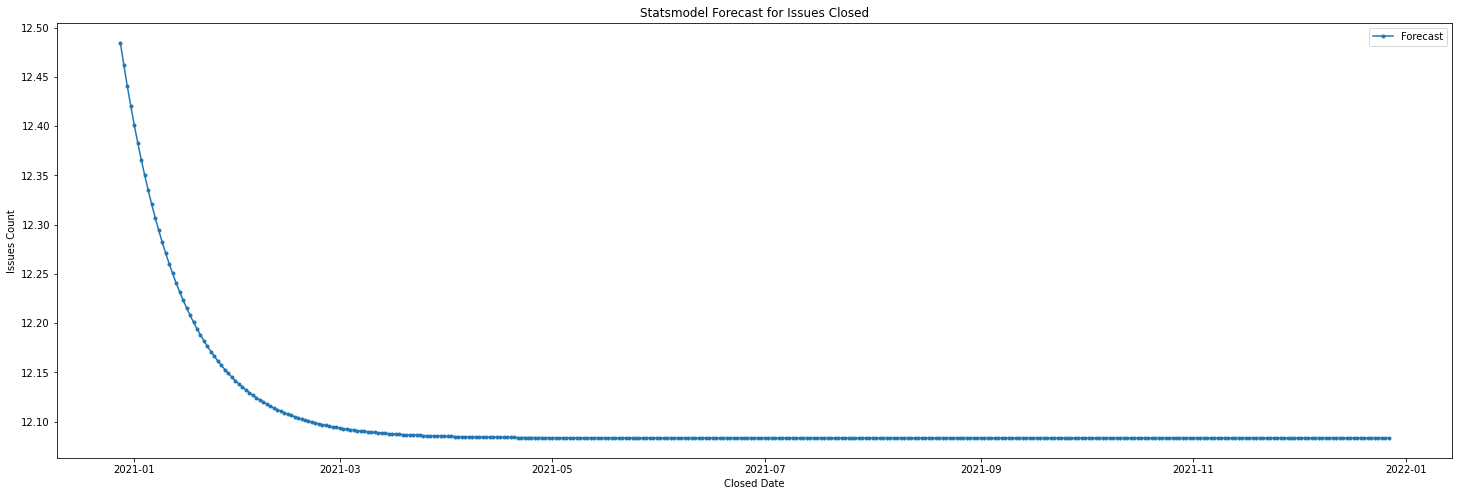

In [75]:
lastDay = max(df_state_closed['ds'])
X = [lastDay + timedelta(days=i) for i in range(1, 365 + 1)]
weekday = pd.Series([x.weekday() for x in X])
X = mdates.date2num(X)
# Predict orders for future dates:
pred_fd = est.forecast(steps=365)
Y = pred_fd[0]

fig, axs = plt.subplots(1, 1, figsize=(25, 8))
axs.plot(X, Y, marker='.', label='Forecast')
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.legend()
axs.set_title('Statsmodel Forecast for Issues Closed')
axs.set_xlabel('Closed Date')
axs.set_ylabel('Issues Count')
plt.show()

**Mean Squared Error of StateModel**

In [76]:
df_stats_model_closed.loc[0,'forecast'] = 2
Acc_For_StateModel = mean_squared_error(df_stats_model_closed['y'],df_stats_model_closed['forecast'])
print('Mean Squared Error :',Acc_For_StateModel)

Mean Squared Error : 431.22296182418967


# **Experiment #3**

# **Timeseries Forecasting using TensorFlow 2/Keras LSTM**

**4) Plot the created issues forecast.**

In [77]:
df_tensor_created = df_fb_created.copy()
df_tensor_created.head()

ds   y
0 2019-01-05  26
1 2019-01-06  26
2 2019-01-07  26
3 2019-01-08  26
4 2019-01-09  26

In [78]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [79]:
lzip = lambda *x:list(zip(*x))

days_created = df_tensor_created.groupby('ds')['ds'].value_counts()
Y_created = df_tensor_created['y'].values
X_created = lzip(*days_created.index.values)[0]
firstDay_created = min(X_created)

# To achieve data consistancy with both actual data and predicted values, I'm adding zeros to dates that do not have orders
Ys_created = [0, ] * ((max(X_created) - firstDay_created).days + 1)#[firstDay + timedelta(days=day) for day in range((max(X) - firstDay).days + 1)]
days_created = pd.Series([firstDay_created + timedelta(days=i) for i in range(len(Ys_created))])
for x, y in zip(X_created, Y_created):
    Ys_created[(x - firstDay_created).days] = y

In [80]:
Ys_created = np.array(Ys_created)
Ys_created = Ys_created.astype('float32')
Ys_created = np.reshape(Ys_created, (-1, 1))
scaler_created = MinMaxScaler(feature_range=(0, 1))
Ys_created = scaler_created.fit_transform(Ys_created)
train_size_created = int(len(Ys_created) * 0.80)
test_size_created = len(Ys_created) - train_size_created
train_created, test_created = Ys_created[0:train_size_created, :], Ys_created[train_size_created:len(Ys_created), :]
print('train size:', len(train_created), ", test size:", len(test_created))

train size: 574 , test size: 144


In [81]:
# Look back decides how many days of data the model looks at for prediction
look_back_created = 30 # Here LSTM looks at approximately one month data
X_train_created, Y_train_created = create_dataset(train_created, look_back_created)
X_test_created, Y_test_created = create_dataset(test_created, look_back_created)

# reshape input to be [samples, time steps, features]
X_train_created = np.reshape(X_train_created, (X_train_created.shape[0], 1, X_train_created.shape[1]))
X_test_created = np.reshape(X_test_created, (X_test_created.shape[0], 1, X_test_created.shape[1]))

# verifying the shapes
X_train_created.shape, X_test_created.shape, Y_train_created.shape, Y_test_created.shape

((543, 1, 30), (113, 1, 30), (543,), (113,))

In [82]:
model_created = Sequential()
model_created.add(LSTM(100, input_shape=(X_train_created.shape[1], X_train_created.shape[2])))
model_created.add(Dropout(0.2))
model_created.add(Dense(1))
model_created.compile(loss='mean_squared_error', optimizer='adam')

history_created = model_created.fit(X_train_created, Y_train_created, epochs=20, batch_size=70, validation_data=(X_test_created, Y_test_created),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model_created.summary()

Epoch 1/20
8/8 [==============================] - 3s 88ms/step - loss: 0.0211 - val_loss: 0.0029
Epoch 2/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0144 - val_loss: 0.0032
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0125 - val_loss: 0.0023
Epoch 4/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0109 - val_loss: 0.0017
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0096 - val_loss: 0.0015
Epoch 6/20
8/8 [==============================] - 0s 13ms/step - loss: 0.0093 - val_loss: 0.0015
Epoch 7/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0084 - val_loss: 0.0014
Epoch 8/20
8/8 [==============================] - 0s 14ms/step - loss: 0.0081 - val_loss: 0.0012
Epoch 9/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 10/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0074 - val_loss: 0.0011
Epoch 11/20
8/8 [============

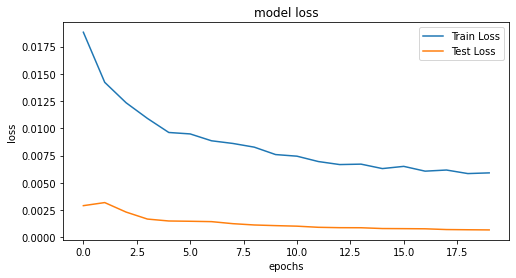

In [83]:
plt.figure(figsize=(8,4))
plt.plot(history_created.history['loss'], label='Train Loss')
plt.plot(history_created.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [84]:
y_pred_created = model_created.predict(X_test_created)

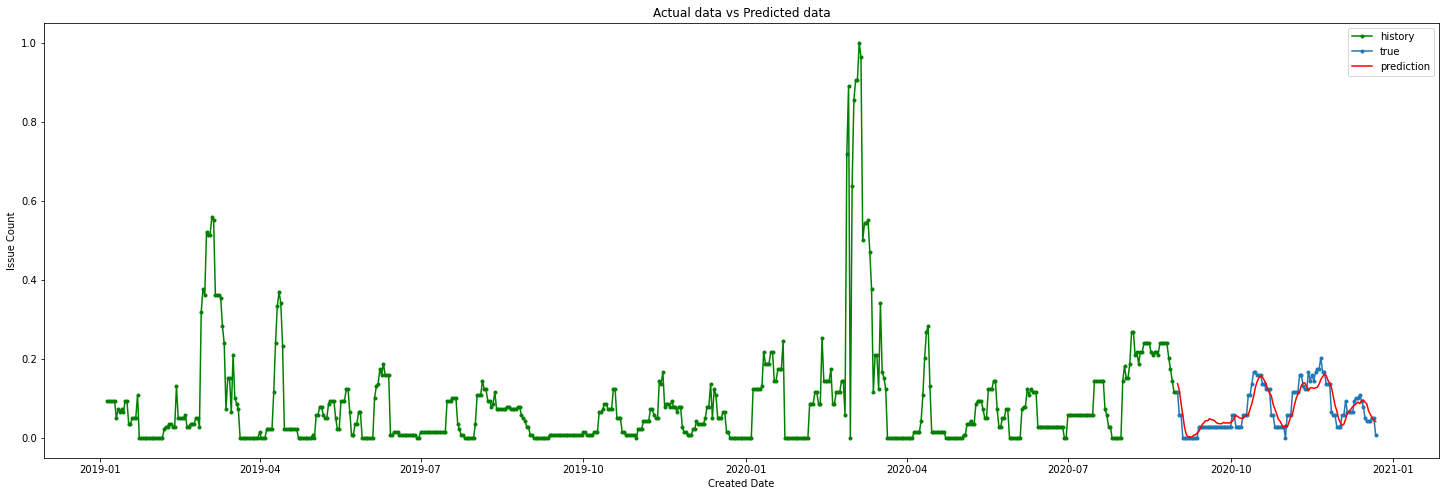

In [85]:
fig, axs = plt.subplots(1, 1, figsize=(25, 8))
X= mdates.date2num(days_created)
test_count = Y_test_created.shape[0]
train_count = X.shape[0] - test_count
axs.plot(X[slice(0, train_count)], Ys_created[slice(0, train_count)], marker='.', color ='g', label="history")
axs.plot(X[slice(train_count, X.shape[0])], Y_test_created, marker='.', label="true")
axs.plot(X[slice(train_count, X.shape[0])], y_pred_created, 'r', label="prediction")
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.legend()
axs.set_title('Actual data vs Predicted data')
axs.set_xlabel('Created Date')
axs.set_ylabel('Issue Count')
plt.show()

INFO:prophet:Making 2 forecasts with cutoffs between 2019-06-26 00:00:00 and 2019-12-23 00:00:00


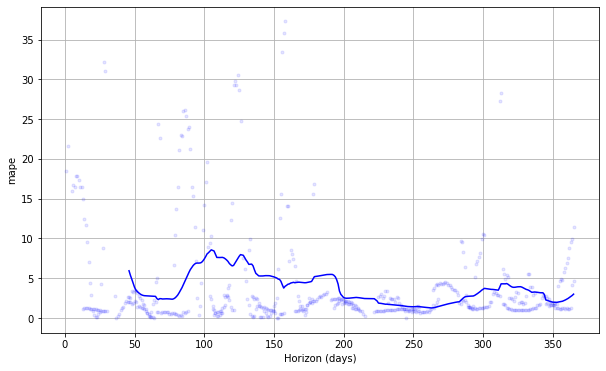

In [86]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
model_created = m.fit(df_tensor_created)
df_cv = cross_validation(model = m, initial='30 days', period='180 days', horizon='365 days')

df_p = performance_metrics(df_cv)

fig = plot_cross_validation_metric(df_cv, metric='mape')

**5) Plot the closed issues forecast.**

In [87]:
df_tensor_closed = df_state_closed.copy()
df_tensor_closed.head()

ds   y
0 2019-02-12   2
1 2019-02-15  10
2 2019-02-18  26
3 2019-03-03  80
4 2019-03-04   6

In [88]:
days_closed = df_tensor_closed.groupby('ds')['ds'].value_counts()
Y_closed = df_tensor_closed['y'].values
X_closed = lzip(*days_closed.index.values)[0]
firstDay_closed = min(X_closed)

# To achieve data consistancy with both actual data and predicted values, I'm adding zeros to dates that do not have orders
Ys_closed = [0, ] * ((max(X_closed) - firstDay_closed).days + 1)#[firstDay + timedelta(days=day) for day in range((max(X) - firstDay).days + 1)]
days_closed = pd.Series([firstDay_closed + timedelta(days=i) for i in range(len(Ys_closed))])
for x, y in zip(X_closed, Y_closed):
    Ys_closed[(x - firstDay_closed).days] = y

In [89]:
# modify the data that is suitable for LSTM
Ys_closed = np.array(Ys_closed)
Ys_closed = Ys_closed.astype('float32')
Ys_closed = np.reshape(Ys_closed, (-1, 1))
Ys_closed_No_normal = Ys_closed
scaler_closed = MinMaxScaler(feature_range=(0, 1))
Ys_closed = scaler_closed.fit_transform(Ys_closed)
train_size_closed = int(len(Ys_closed) * 0.80)
test_size_closed = len(Ys_closed) - train_size_closed
train_closed, test_closed = Ys_closed[0:train_size_closed, :], Ys_closed[train_size_closed:len(Ys_closed), :]
print('train size:', len(train_closed), ", test size:", len(test_closed))

train size: 548 , test size: 137


In [90]:
# Look back decides how many days of data the model looks at for prediction
look_back_closed = 30 # Here LSTM looks at approximately one month data
X_train_closed, Y_train_closed = create_dataset(train_closed, look_back_closed)
X_test_closed, Y_test_closed = create_dataset(test_closed, look_back_closed)

# reshape input to be [samples, time steps, features]
X_train_closed = np.reshape(X_train_closed, (X_train_closed.shape[0], 1, X_train_closed.shape[1]))
X_test_closed = np.reshape(X_test_closed, (X_test_closed.shape[0], 1, X_test_closed.shape[1]))

# verifying the shapes
X_train_closed.shape, X_test_closed.shape, Y_train_closed.shape, Y_test_closed.shape

((517, 1, 30), (106, 1, 30), (517,), (106,))

In [91]:
model_closed = Sequential()
model_closed.add(LSTM(100, input_shape=(X_train_closed.shape[1], X_train_closed.shape[2])))
model_closed.add(Dropout(0.2))
model_closed.add(Dense(1))
model_closed.compile(loss='mean_squared_error', optimizer='adam')

history_closed = model_closed.fit(X_train_closed, Y_train_closed, epochs=20, batch_size=70, validation_data=(X_test_closed, Y_test_closed),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model_closed.summary()

Epoch 1/20
8/8 [==============================] - 2s 80ms/step - loss: 0.0161 - val_loss: 0.0032
Epoch 2/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0126 - val_loss: 0.0028
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0115 - val_loss: 0.0027
Epoch 4/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0104 - val_loss: 0.0028
Epoch 5/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0099 - val_loss: 0.0027
Epoch 6/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0091 - val_loss: 0.0026
Epoch 7/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0089 - val_loss: 0.0026
Epoch 8/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0087 - val_loss: 0.0026
Epoch 9/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0083 - val_loss: 0.0026
Epoch 10/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0083 - val_loss: 0.0026
Epoch 11/20
8/8 [============

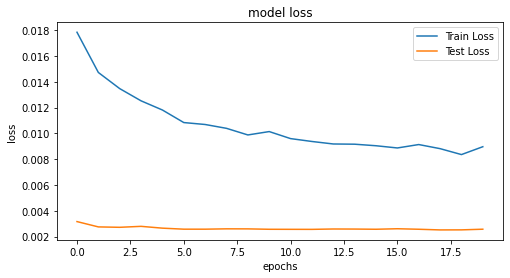

In [92]:
plt.figure(figsize=(8,4))
plt.plot(history_closed.history['loss'], label='Train Loss')
plt.plot(history_closed.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [93]:
y_pred_closed = model_closed.predict(X_test_closed)

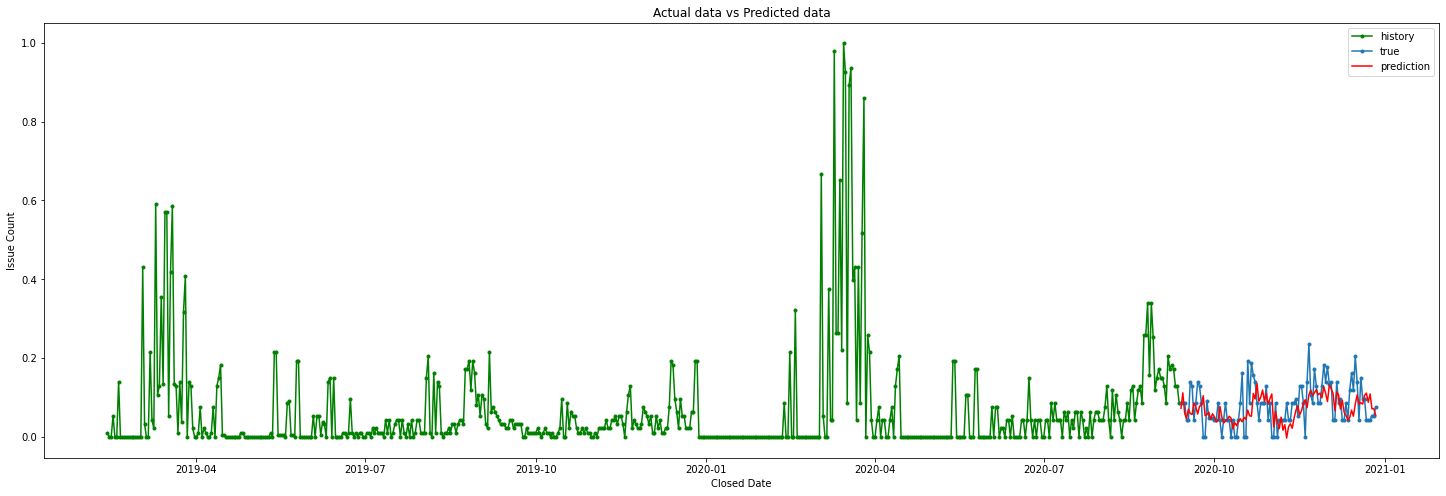

In [94]:
fig, axs = plt.subplots(1, 1, figsize=(25, 8))
X= mdates.date2num(days_closed)
test_count = Y_test_closed.shape[0]
train_count = X.shape[0] - test_count
axs.plot(X[slice(0, train_count)], Ys_closed[slice(0, train_count)], marker='.', color ='g', label="history")
axs.plot(X[slice(train_count, X.shape[0])], Y_test_closed, marker='.', label="true")
axs.plot(X[slice(train_count, X.shape[0])], y_pred_closed, 'r', label="prediction")
locator = mdates.AutoDateLocator()
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
axs.legend()
axs.set_title('Actual data vs Predicted data')
axs.set_xlabel('Closed Date')
axs.set_ylabel('Issue Count')
plt.show()

INFO:prophet:Making 2 forecasts with cutoffs between 2019-07-01 00:00:00 and 2019-12-28 00:00:00


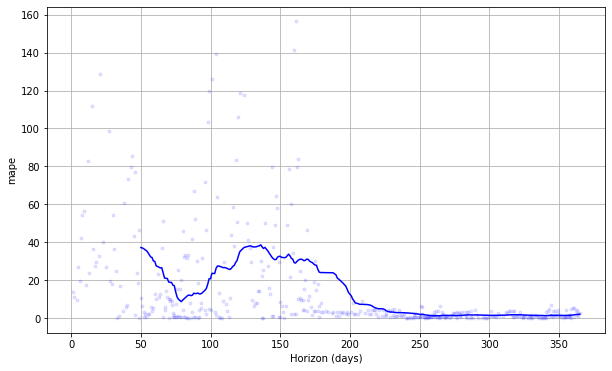

In [95]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
model_closed = m.fit(df_tensor_closed)
df_cv = cross_validation(model = m, initial='30 days', period='180 days', horizon='365 days')

df_p = performance_metrics(df_cv)

fig = plot_cross_validation_metric(df_cv, metric='mape')

**Mean Squared Error of the TensorFlow2/Keras LSTM Model**

**With Normalization**

In [96]:
acc_of_Tensorflow_with_norm = mean_squared_error(y_pred_closed,Y_test_closed)
print('Mean Squared Error with Normalization:', acc_of_Tensorflow_with_norm)

Mean Squared Error with Normalization: 0.002573202


**Without Normalization of the data**

In [97]:
train_size_closed = int(len(Ys_closed_No_normal) * 0.80)
test_size_closed = len(Ys_closed_No_normal) - train_size_closed
train_closed, test_closed = Ys_closed_No_normal[0:train_size_closed, :], Ys_closed_No_normal[train_size_closed:len(Ys_closed_No_normal), :]
print('train size:', len(train_closed), ", test size:", len(test_closed))

train size: 548 , test size: 137


In [98]:
# Look back decides how many days of data the model looks at for prediction
look_back_closed = 30 # Here LSTM looks at approximately one month data
X_train_closed, Y_train_closed = create_dataset(train_closed, look_back_closed)
X_test_closed, Y_test_closed = create_dataset(test_closed, look_back_closed)

# reshape input to be [samples, time steps, features]
X_train_closed = np.reshape(X_train_closed, (X_train_closed.shape[0], 1, X_train_closed.shape[1]))
X_test_closed = np.reshape(X_test_closed, (X_test_closed.shape[0], 1, X_test_closed.shape[1]))

# verifying the shapes
X_train_closed.shape, X_test_closed.shape, Y_train_closed.shape, Y_test_closed.shape

((517, 1, 30), (106, 1, 30), (517,), (106,))

In [99]:
model_closed = Sequential()
model_closed.add(LSTM(100, input_shape=(X_train_closed.shape[1], X_train_closed.shape[2])))
model_closed.add(Dropout(0.2))
model_closed.add(Dense(1))
model_closed.compile(loss='mean_squared_error', optimizer='adam')

history_closed = model_closed.fit(X_train_closed, Y_train_closed, epochs=20, batch_size=70, validation_data=(X_test_closed, Y_test_closed),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/20
8/8 [==============================] - 3s 87ms/step - loss: 586.2267 - val_loss: 280.6778
Epoch 2/20
8/8 [==============================] - 0s 11ms/step - loss: 567.2252 - val_loss: 245.3719
Epoch 3/20
8/8 [==============================] - 0s 12ms/step - loss: 549.6438 - val_loss: 216.7552
Epoch 4/20
8/8 [==============================] - 0s 11ms/step - loss: 537.7297 - val_loss: 191.9622
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 526.5970 - val_loss: 170.2170
Epoch 6/20
8/8 [==============================] - 0s 12ms/step - loss: 517.5206 - val_loss: 153.6397
Epoch 7/20
8/8 [==============================] - 0s 12ms/step - loss: 505.1990 - val_loss: 142.3493
Epoch 8/20
8/8 [==============================] - 0s 12ms/step - loss: 496.8322 - val_loss: 134.7707
Epoch 9/20
8/8 [==============================] - 0s 13ms/step - loss: 490.7608 - val_loss: 129.9079
Epoch 10/20
8/8 [==============================] - 0s 11ms/step - loss: 482.1586 - val_loss

In [100]:
y_pred_closed = model_closed.predict(X_test_closed)

In [101]:
acc_of_Tensorflow_without_norm = mean_squared_error(y_pred_closed,Y_test_closed)
print('Mean Squared Error without Normalization of the data:',mean_squared_error(y_pred_closed,Y_test_closed))

Mean Squared Error without Normalization of the data: 108.971405


# **Comparative Analysis**

# **Discuss the results and accuracy of the 3 experiments executed above**

**I have already found the Mean Squared Error of each and every model in above code.**

In [102]:
print('Mean Squared Error of the Facebook/Prophet Model :',acc_for_prophet)
print('Mean Squared Error of the StateModel :',Acc_For_StateModel)
print('Mean Squared Error of the Tensorflow Model with Normalization of the data :',acc_of_Tensorflow_with_norm)
print('Mean Squared Error of the Tensorflow Model without Normalization of the data :',acc_of_Tensorflow_without_norm)

Mean Squared Error of the Facebook/Prophet Model : 359.9869859528251
Mean Squared Error of the StateModel : 431.22296182418967
Mean Squared Error of the Tensorflow Model with Normalization of the data : 0.002573202
Mean Squared Error of the Tensorflow Model without Normalization of the data : 108.971405


**Comparative Analysis :**
- The model who obtain the minimum "Mean Squared Error" is considerd as a better model. 
- In our case, TensorFlow2/Keras LSTM model has forcasted well among all the other models.